### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## Travel Datasets & Treatment of missing values

In [2]:
df1 = pd.read_csv("Traveldata_train.csv")
df1['dataset_type'] = 'train'

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   dataset_type             94379 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 7.2+ MB


In [4]:
df2 = pd.read_csv('Traveldata_test.csv')
df2['dataset_type'] = 'test'

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   dataset_type             35602 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 2.7+ MB


## Union the two tables

In [6]:
df_travel = pd.concat([df1, df2])

In [7]:
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Gender                   129874 non-null  object 
 2   Customer_Type            117647 non-null  object 
 3   Age                      129937 non-null  float64
 4   Type_Travel              117307 non-null  object 
 5   Travel_Class             129981 non-null  object 
 6   Travel_Distance          129981 non-null  int64  
 7   Departure_Delay_in_Mins  129895 non-null  float64
 8   Arrival_Delay_in_Mins    129501 non-null  float64
 9   dataset_type             129981 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 10.9+ MB


In [8]:
travel = df_travel.copy()

In [9]:
travel.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   
1             2200                      9.0                    0.0   
2             1061                     77.0                  119.0   
3              780                     13.0                   18.0   
4             1981                      0.0                    0.0   

  dataset_type  
0        train  
1        train  
2        train  
3        train  
4        train

In [10]:
travel.tail()

ID  Gender      Customer_Type   Age      Type_Travel  \
35597  99935598    Male     Loyal Customer   8.0  Personal Travel   
35598  99935599  Female     Loyal Customer  53.0  Business Travel   
35599  99935600    Male  Disloyal Customer  22.0  Business Travel   
35600  99935601  Female     Loyal Customer  67.0  Personal Travel   
35601  99935602    Male                NaN  20.0  Personal Travel   

      Travel_Class  Travel_Distance  Departure_Delay_in_Mins  \
35597          Eco             1334                      0.0   
35598     Business             1772                      0.0   
35599          Eco             1180                      0.0   
35600          Eco              420                     23.0   
35601          Eco             1680                      0.0   

       Arrival_Delay_in_Mins dataset_type  
35597                    0.0         test  
35598                    0.0         test  
35599                    0.0         test  
35600                   16.0         test  
35601                    0.0         test

### **Checking for missing values**

In [11]:
missing_values_travel = travel.isnull().sum()
missing_values_travel.sort_values(ascending=False)

Type_Travel                12674
Customer_Type              12334
Arrival_Delay_in_Mins        480
Gender                       107
Departure_Delay_in_Mins       86
Age                           44
ID                             0
Travel_Class                   0
Travel_Distance                0
dataset_type                   0
dtype: int64

In [12]:
share_missing_values_travel = missing_values_travel/travel.isnull().count()
share_missing_values_travel.sort_values(ascending=False)

Type_Travel                0.097507
Customer_Type              0.094891
Arrival_Delay_in_Mins      0.003693
Gender                     0.000823
Departure_Delay_in_Mins    0.000662
Age                        0.000339
ID                         0.000000
Travel_Class               0.000000
Travel_Distance            0.000000
dataset_type               0.000000
dtype: float64

## Treating missing values of travel data

In [13]:
def clean_travel(df):
    # Separating categories and numerics 
    cat_list = df.select_dtypes(['object']).columns.tolist()
    num_list = df.select_dtypes(['number']).columns.tolist()

    # Replacing NaN values in the data
    #10% of values for cust type and travel type are unknown - this could be significant
    #df.loc[df['Customer_Type'].isnull(),'Customer_Type'] =  df['Customer_Type'].mode()[0]
    df.loc[df['Customer_Type'].isnull(),'Customer_Type'] =  "Unknown"
    #df.loc[df['Type_Travel'].isnull(),'Type_Travel'] =  df['Type_Travel'].mode()[0]
    df.loc[df['Type_Travel'].isnull(),'Type_Travel'] =  "Unknown"
    # added this 
    df.loc[df['Gender'].isnull(),'Gender'] =  "Unknown"

    df.loc[df['Age'].isnull(),'Age'] =  df['Age'].mean()
    
    df.loc[df['Departure_Delay_in_Mins'].isnull(),'Departure_Delay_in_Mins'] = df['Departure_Delay_in_Mins'].median() 
    df.loc[df['Arrival_Delay_in_Mins'].isnull(),'Arrival_Delay_in_Mins'] = df['Arrival_Delay_in_Mins'].median() 

    df.loc[df['Gender'].isnull(),'Gender'] = df['Gender'].mode() 
    #dropping Gender Na would lose too much info however less than 0.1% of samples are unknown.  we will just use mode
    
    for col in cat_list:
        df[col] = df[col].astype('category')
    
    return df

In [14]:
cleaned_travel = clean_travel(travel)

In [15]:
cleaned_travel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   ID                       129981 non-null  int64   
 1   Gender                   129981 non-null  category
 2   Customer_Type            129981 non-null  category
 3   Age                      129981 non-null  float64 
 4   Type_Travel              129981 non-null  category
 5   Travel_Class             129981 non-null  category
 6   Travel_Distance          129981 non-null  int64   
 7   Departure_Delay_in_Mins  129981 non-null  float64 
 8   Arrival_Delay_in_Mins    129981 non-null  float64 
 9   dataset_type             129981 non-null  category
dtypes: category(5), float64(3), int64(2)
memory usage: 6.6 MB


## Survey Datasets & Treatment of missing values

In [16]:
df3 =pd.read_csv("Surveydata_train.csv")
df3['dataset_type'] = 'train'

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [18]:
# it's not a 50/50 split balanced but it means that in general in our training data we have more customers who were satisfied (54%)
df3.groupby(['Overall_Experience'])['Overall_Experience'].count()

Overall_Experience
0    42786
1    51593
Name: Overall_Experience, dtype: int64

In [19]:
df4 = pd.read_csv('Surveydata_test.csv')
df4['dataset_type'] = 'test'

In [20]:
# Notice that in the survery data TEST set we don't have the column Overall_Experience. It's normal as our models will need to predict it. 
# However, we will need to exclude a treatment of missing vsalues for that column when we merge the two datasets.
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

## Union the two tables

In [21]:
df_survey = pd.concat([df3, df4])

In [22]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Overall_Experience       94379 non-null   float64
 2   Seat_Comfort             129898 non-null  object 
 3   Seat_Class               129981 non-null  object 
 4   Arrival_Time_Convenient  117726 non-null  object 
 5   Catering                 117883 non-null  object 
 6   Platform_Location        129939 non-null  object 
 7   Onboard_Wifi_Service     129939 non-null  object 
 8   Onboard_Entertainment    129955 non-null  object 
 9   Online_Support           129864 non-null  object 
 10  Ease_of_Online_Booking   129890 non-null  object 
 11  Onboard_Service          119508 non-null  object 
 12  Legroom                  129866 non-null  object 
 13  Baggage_Handling         129799 non-null  object 
 14  Check

In [23]:
survey = df_survey.copy()

In [24]:
survey.head().T

0                  1  \
ID                                98800001           98800002   
Overall_Experience                     0.0                0.0   
Seat_Comfort             Needs Improvement               Poor   
Seat_Class                       Green Car           Ordinary   
Arrival_Time_Convenient          Excellent          Excellent   
Catering                         Excellent               Poor   
Platform_Location          Very Convenient  Needs Improvement   
Onboard_Wifi_Service                  Good               Good   
Onboard_Entertainment    Needs Improvement               Poor   
Online_Support                  Acceptable               Good   
Ease_of_Online_Booking   Needs Improvement               Good   
Onboard_Service          Needs Improvement          Excellent   
Legroom                         Acceptable  Needs Improvement   
Baggage_Handling         Needs Improvement               Poor   
CheckIn_Service                       Good  Needs Improvement   
Cleanliness              Needs Improvement               Good   
Online_Boarding                       Poor               Good   
dataset_type                         train              train   

                                         2                  3  \
ID                                98800003           98800004   
Overall_Experience                     1.0                0.0   
Seat_Comfort             Needs Improvement         Acceptable   
Seat_Class                       Green Car           Ordinary   
Arrival_Time_Convenient  Needs Improvement  Needs Improvement   
Catering                 Needs Improvement                NaN   
Platform_Location        Needs Improvement  Needs Improvement   
Onboard_Wifi_Service     Needs Improvement         Acceptable   
Onboard_Entertainment                 Good  Needs Improvement   
Online_Support                   Excellent         Acceptable   
Ease_of_Online_Booking           Excellent         Acceptable   
Onboard_Service                  Excellent         Acceptable   
Legroom                          Excellent         Acceptable   
Baggage_Handling                 Excellent         Acceptable   
CheckIn_Service                       Good               Good   
Cleanliness                      Excellent         Acceptable   
Online_Boarding                  Excellent         Acceptable   
dataset_type                         train              train   

                                         4  
ID                                98800005  
Overall_Experience                     1.0  
Seat_Comfort                    Acceptable  
Seat_Class                        Ordinary  
Arrival_Time_Convenient         Acceptable  
Catering                        Acceptable  
Platform_Location               Manageable  
Onboard_Wifi_Service     Needs Improvement  
Onboard_Entertainment                 Good  
Online_Support                   Excellent  
Ease_of_Online_Booking                Good  
Onboard_Service                       Good  
Legroom                               Good  
Baggage_Handling                      Good  
CheckIn_Service                       Good  
Cleanliness                           Good  
Online_Boarding                       Good  
dataset_type                         train

In [25]:
survey.tail().T

35597              35598  \
ID                                99935598           99935599   
Overall_Experience                     NaN                NaN   
Seat_Comfort             Needs Improvement  Needs Improvement   
Seat_Class                       Green Car           Ordinary   
Arrival_Time_Convenient          Excellent  Needs Improvement   
Catering                 Needs Improvement               Good   
Platform_Location               Manageable  Needs Improvement   
Onboard_Wifi_Service            Acceptable         Acceptable   
Onboard_Entertainment    Needs Improvement          Excellent   
Online_Support                  Acceptable          Excellent   
Ease_of_Online_Booking          Acceptable               Good   
Onboard_Service                       Good               Good   
Legroom                          Excellent               Good   
Baggage_Handling                      Good               Good   
CheckIn_Service                 Acceptable         Acceptable   
Cleanliness                           Good               Good   
Online_Boarding                 Acceptable               Good   
dataset_type                          test               test   

                                     35599         35600              35601  
ID                                99935600      99935601           99935602  
Overall_Experience                     NaN           NaN                NaN  
Seat_Comfort                          Good     Excellent               Good  
Seat_Class                       Green Car      Ordinary           Ordinary  
Arrival_Time_Convenient     Extremely Poor     Excellent         Acceptable  
Catering                              Good     Excellent               Good  
Platform_Location        Needs Improvement  Inconvenient         Manageable  
Onboard_Wifi_Service     Needs Improvement    Acceptable               Poor  
Onboard_Entertainment                 Good     Excellent               Good  
Online_Support                        Poor          Good               Poor  
Ease_of_Online_Booking   Needs Improvement     Excellent               Poor  
Onboard_Service                       Poor     Excellent         Acceptable  
Legroom                         Acceptable     Excellent               Good  
Baggage_Handling                      Poor     Excellent               Good  
CheckIn_Service                       Poor    Acceptable  Needs Improvement  
Cleanliness                      Excellent     Excellent               Good  
Online_Boarding          Needs Improvement          Good               Poor  
dataset_type                          test          test               test

## Checking for missing values

In [26]:
missing_values_survey = survey.isnull().sum()
missing_values_survey.sort_values(ascending=False)

Overall_Experience         35602
Arrival_Time_Convenient    12255
Catering                   12098
Onboard_Service            10473
Baggage_Handling             182
Online_Support               117
Legroom                      115
CheckIn_Service               99
Ease_of_Online_Booking        91
Seat_Comfort                  83
Platform_Location             42
Onboard_Wifi_Service          42
Onboard_Entertainment         26
Cleanliness                    8
Online_Boarding                8
ID                             0
Seat_Class                     0
dataset_type                   0
dtype: int64

In [27]:
share_missing_values_survey = missing_values_survey/survey.isnull().count()
share_missing_values_survey.sort_values(ascending=False)

Overall_Experience         0.273902
Arrival_Time_Convenient    0.094283
Catering                   0.093075
Onboard_Service            0.080573
Baggage_Handling           0.001400
Online_Support             0.000900
Legroom                    0.000885
CheckIn_Service            0.000762
Ease_of_Online_Booking     0.000700
Seat_Comfort               0.000639
Platform_Location          0.000323
Onboard_Wifi_Service       0.000323
Onboard_Entertainment      0.000200
Cleanliness                0.000062
Online_Boarding            0.000062
ID                         0.000000
Seat_Class                 0.000000
dataset_type               0.000000
dtype: float64

## Treating missing values of Survey Data

In [28]:
# to not treat the values for the test set, we don't have missing values in the train set
survey.drop('Overall_Experience',axis=1,inplace=True)

In [29]:
# I had to do it separately otherwise missing values remain but by doing it before hand it works
survey['Platform_Location'].fillna('no answer', inplace = True)

In [30]:
#this one cell cleans all the data for the survey train/test
def clean_survey(df):
    #create a list of ratings columns. Exclude ID and Overall experience
    #remove seat class - it is a classifier
    #reomve Platform location for separate treatment
    cols_rating = df.columns[2:]
    cols_rating = cols_rating.drop(['Seat_Class','Platform_Location'])
    #fill NA in both train and test
    for i in cols_rating:
        df[i].fillna('no answer', inplace = True)
    #***NOTE - I moved no answer to the middle value instead of the low value.  may want to test both.
    #***NOTE - What happens if we increase the weights on thses numbers doubled? squared? etc
    #set values to replace
    names = [
        'Excellent',
        'Good',
        'Acceptable',
        'no answer',
        'Needs Improvement',
        'Poor',
        'Extremely Poor'
    ]
    #set values to replace for Platform_Location
    names_plat = [
        'Very Convenient',
        'Convenient',
        'Manageable',
        'no answer',
        'Needs Improvement', 
        'Inconvenient',
        'Very Inconvenient',
    ]
    #numbers that will replace inputs
    numbers = [6,5,4,3,2,1,0]
    #replace the values in the dataframes
    for i in df[cols_rating]:
        df[i].replace(to_replace = names, value = numbers, inplace=True)
    #Also replace 'Platform_Location' column with numbers
    df['Platform_Location'].replace(to_replace = names_plat, value = numbers, inplace=True)
    #Set seat class as a category
    df['Seat_Class'].astype('category')
    
    return df

In [31]:
cleaned_survey = clean_survey(survey)

In [32]:
cleaned_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       129981 non-null  int64 
 1   Seat_Comfort             129898 non-null  object
 2   Seat_Class               129981 non-null  object
 3   Arrival_Time_Convenient  129981 non-null  int64 
 4   Catering                 129981 non-null  int64 
 5   Platform_Location        129981 non-null  int64 
 6   Onboard_Wifi_Service     129981 non-null  int64 
 7   Onboard_Entertainment    129981 non-null  int64 
 8   Online_Support           129981 non-null  int64 
 9   Ease_of_Online_Booking   129981 non-null  int64 
 10  Onboard_Service          129981 non-null  int64 
 11  Legroom                  129981 non-null  int64 
 12  Baggage_Handling         129981 non-null  int64 
 13  CheckIn_Service          129981 non-null  int64 
 14  Cleanliness          

In [33]:
survey_train_set = cleaned_survey[cleaned_survey['dataset_type']=='train']

In [34]:
survey_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Seat_Comfort             94318 non-null  object
 2   Seat_Class               94379 non-null  object
 3   Arrival_Time_Convenient  94379 non-null  int64 
 4   Catering                 94379 non-null  int64 
 5   Platform_Location        94379 non-null  int64 
 6   Onboard_Wifi_Service     94379 non-null  int64 
 7   Onboard_Entertainment    94379 non-null  int64 
 8   Online_Support           94379 non-null  int64 
 9   Ease_of_Online_Booking   94379 non-null  int64 
 10  Onboard_Service          94379 non-null  int64 
 11  Legroom                  94379 non-null  int64 
 12  Baggage_Handling         94379 non-null  int64 
 13  CheckIn_Service          94379 non-null  int64 
 14  Cleanliness              94379 non-nul

In [35]:
df3_overall_experience = df3[['ID','Overall_Experience']]

In [36]:
survey_train_set = survey_train_set.merge(df3_overall_experience,on='ID',how='inner')

In [37]:
survey_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Seat_Comfort             94318 non-null  object
 2   Seat_Class               94379 non-null  object
 3   Arrival_Time_Convenient  94379 non-null  int64 
 4   Catering                 94379 non-null  int64 
 5   Platform_Location        94379 non-null  int64 
 6   Onboard_Wifi_Service     94379 non-null  int64 
 7   Onboard_Entertainment    94379 non-null  int64 
 8   Online_Support           94379 non-null  int64 
 9   Ease_of_Online_Booking   94379 non-null  int64 
 10  Onboard_Service          94379 non-null  int64 
 11  Legroom                  94379 non-null  int64 
 12  Baggage_Handling         94379 non-null  int64 
 13  CheckIn_Service          94379 non-null  int64 
 14  Cleanliness              94379 non-nul

In [38]:
survey_train_set.head().T

0         1                  2  \
ID                                98800001  98800002           98800003   
Seat_Comfort             Needs Improvement      Poor  Needs Improvement   
Seat_Class                       Green Car  Ordinary          Green Car   
Arrival_Time_Convenient                  6         6                  2   
Catering                                 6         1                  2   
Platform_Location                        6         2                  2   
Onboard_Wifi_Service                     5         5                  2   
Onboard_Entertainment                    2         1                  5   
Online_Support                           4         5                  6   
Ease_of_Online_Booking                   2         5                  6   
Onboard_Service                          2         6                  6   
Legroom                                  4         2                  6   
Baggage_Handling                         2         1                  6   
CheckIn_Service                          5         2                  5   
Cleanliness                              2         5                  6   
Online_Boarding                          1         5                  6   
dataset_type                         train     train              train   
Overall_Experience                       0         0                  1   

                                  3           4  
ID                         98800004    98800005  
Seat_Comfort             Acceptable  Acceptable  
Seat_Class                 Ordinary    Ordinary  
Arrival_Time_Convenient           2           4  
Catering                          3           4  
Platform_Location                 2           4  
Onboard_Wifi_Service              4           2  
Onboard_Entertainment             2           5  
Online_Support                    4           6  
Ease_of_Online_Booking            4           5  
Onboard_Service                   4           5  
Legroom                           4           5  
Baggage_Handling                  4           5  
CheckIn_Service                   5           5  
Cleanliness                       4           5  
Online_Boarding                   4           5  
dataset_type                  train       train  
Overall_Experience                0           1

In [39]:
survey_test_set = survey[survey['dataset_type']=='test']

In [40]:
cleaned_survey = pd.concat([survey_train_set, survey_test_set])

In [41]:
cleaned_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Seat_Comfort             129898 non-null  object 
 2   Seat_Class               129981 non-null  object 
 3   Arrival_Time_Convenient  129981 non-null  int64  
 4   Catering                 129981 non-null  int64  
 5   Platform_Location        129981 non-null  int64  
 6   Onboard_Wifi_Service     129981 non-null  int64  
 7   Onboard_Entertainment    129981 non-null  int64  
 8   Online_Support           129981 non-null  int64  
 9   Ease_of_Online_Booking   129981 non-null  int64  
 10  Onboard_Service          129981 non-null  int64  
 11  Legroom                  129981 non-null  int64  
 12  Baggage_Handling         129981 non-null  int64  
 13  CheckIn_Service          129981 non-null  int64  
 14  Clean

In [42]:
cleaned_survey.head().T

0         1                  2  \
ID                                98800001  98800002           98800003   
Seat_Comfort             Needs Improvement      Poor  Needs Improvement   
Seat_Class                       Green Car  Ordinary          Green Car   
Arrival_Time_Convenient                  6         6                  2   
Catering                                 6         1                  2   
Platform_Location                        6         2                  2   
Onboard_Wifi_Service                     5         5                  2   
Onboard_Entertainment                    2         1                  5   
Online_Support                           4         5                  6   
Ease_of_Online_Booking                   2         5                  6   
Onboard_Service                          2         6                  6   
Legroom                                  4         2                  6   
Baggage_Handling                         2         1                  6   
CheckIn_Service                          5         2                  5   
Cleanliness                              2         5                  6   
Online_Boarding                          1         5                  6   
dataset_type                         train     train              train   
Overall_Experience                     0.0       0.0                1.0   

                                  3           4  
ID                         98800004    98800005  
Seat_Comfort             Acceptable  Acceptable  
Seat_Class                 Ordinary    Ordinary  
Arrival_Time_Convenient           2           4  
Catering                          3           4  
Platform_Location                 2           4  
Onboard_Wifi_Service              4           2  
Onboard_Entertainment             2           5  
Online_Support                    4           6  
Ease_of_Online_Booking            4           5  
Onboard_Service                   4           5  
Legroom                           4           5  
Baggage_Handling                  4           5  
CheckIn_Service                   5           5  
Cleanliness                       4           5  
Online_Boarding                   4           5  
dataset_type                  train       train  
Overall_Experience              0.0         1.0

In [43]:
cleaned_survey.tail().T

35597              35598      35599  \
ID                                99935598           99935599   99935600   
Seat_Comfort             Needs Improvement  Needs Improvement       Good   
Seat_Class                       Green Car           Ordinary  Green Car   
Arrival_Time_Convenient                  6                  2          0   
Catering                                 2                  5          5   
Platform_Location                        4                  2          2   
Onboard_Wifi_Service                     4                  4          2   
Onboard_Entertainment                    2                  6          5   
Online_Support                           4                  6          1   
Ease_of_Online_Booking                   4                  5          2   
Onboard_Service                          5                  5          1   
Legroom                                  6                  5          4   
Baggage_Handling                         5                  5          1   
CheckIn_Service                          4                  4          1   
Cleanliness                              5                  5          6   
Online_Boarding                          4                  5          2   
dataset_type                          test               test       test   
Overall_Experience                     NaN                NaN        NaN   

                             35600     35601  
ID                        99935601  99935602  
Seat_Comfort             Excellent      Good  
Seat_Class                Ordinary  Ordinary  
Arrival_Time_Convenient          6         4  
Catering                         6         5  
Platform_Location                1         4  
Onboard_Wifi_Service             4         1  
Onboard_Entertainment            6         5  
Online_Support                   5         1  
Ease_of_Online_Booking           6         1  
Onboard_Service                  6         4  
Legroom                          6         5  
Baggage_Handling                 6         5  
CheckIn_Service                  4         2  
Cleanliness                      6         5  
Online_Boarding                  5         1  
dataset_type                  test      test  
Overall_Experience             NaN       NaN

# Joining Travel + Survey treated DFs

In [44]:
df = cleaned_travel.merge(cleaned_survey,on='ID',how='inner')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 129980
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   ID                       129981 non-null  int64   
 1   Gender                   129981 non-null  category
 2   Customer_Type            129981 non-null  category
 3   Age                      129981 non-null  float64 
 4   Type_Travel              129981 non-null  category
 5   Travel_Class             129981 non-null  category
 6   Travel_Distance          129981 non-null  int64   
 7   Departure_Delay_in_Mins  129981 non-null  float64 
 8   Arrival_Delay_in_Mins    129981 non-null  float64 
 9   dataset_type_x           129981 non-null  category
 10  Seat_Comfort             129898 non-null  object  
 11  Seat_Class               129981 non-null  object  
 12  Arrival_Time_Convenient  129981 non-null  int64   
 13  Catering                 129981 non-null  in

In [46]:
cols = df.select_dtypes(['object']).columns.tolist()
cols.append('Overall_Experience')
for i in cols:
    df[i] = df[i].astype('category')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 129980
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   ID                       129981 non-null  int64   
 1   Gender                   129981 non-null  category
 2   Customer_Type            129981 non-null  category
 3   Age                      129981 non-null  float64 
 4   Type_Travel              129981 non-null  category
 5   Travel_Class             129981 non-null  category
 6   Travel_Distance          129981 non-null  int64   
 7   Departure_Delay_in_Mins  129981 non-null  float64 
 8   Arrival_Delay_in_Mins    129981 non-null  float64 
 9   dataset_type_x           129981 non-null  category
 10  Seat_Comfort             129898 non-null  category
 11  Seat_Class               129981 non-null  category
 12  Arrival_Time_Convenient  129981 non-null  int64   
 13  Catering                 129981 non-null  in

In [48]:
df.head().T

0                1  \
ID                                98800001         98800002   
Gender                              Female             Male   
Customer_Type               Loyal Customer   Loyal Customer   
Age                                   52.0             48.0   
Type_Travel                        Unknown  Personal Travel   
Travel_Class                      Business              Eco   
Travel_Distance                        272             2200   
Departure_Delay_in_Mins                0.0              9.0   
Arrival_Delay_in_Mins                  5.0              0.0   
dataset_type_x                       train            train   
Seat_Comfort             Needs Improvement             Poor   
Seat_Class                       Green Car         Ordinary   
Arrival_Time_Convenient                  6                6   
Catering                                 6                1   
Platform_Location                        6                2   
Onboard_Wifi_Service                     5                5   
Onboard_Entertainment                    2                1   
Online_Support                           4                5   
Ease_of_Online_Booking                   2                5   
Onboard_Service                          2                6   
Legroom                                  4                2   
Baggage_Handling                         2                1   
CheckIn_Service                          5                2   
Cleanliness                              2                5   
Online_Boarding                          1                5   
dataset_type_y                       train            train   
Overall_Experience                     0.0              0.0   

                                         2                3                4  
ID                                98800003         98800004         98800005  
Gender                              Female           Female           Female  
Customer_Type               Loyal Customer   Loyal Customer   Loyal Customer  
Age                                   43.0             44.0             50.0  
Type_Travel                Business Travel  Business Travel  Business Travel  
Travel_Class                      Business         Business         Business  
Travel_Distance                       1061              780             1981  
Departure_Delay_in_Mins               77.0             13.0              0.0  
Arrival_Delay_in_Mins                119.0             18.0              0.0  
dataset_type_x                       train            train            train  
Seat_Comfort             Needs Improvement       Acceptable       Acceptable  
Seat_Class                       Green Car         Ordinary         Ordinary  
Arrival_Time_Convenient                  2                2                4  
Catering                                 2                3                4  
Platform_Location                        2                2                4  
Onboard_Wifi_Service                     2                4                2  
Onboard_Entertainment                    5                2                5  
Online_Support                           6                4                6  
Ease_of_Online_Booking                   6                4                5  
Onboard_Service                          6                4                5  
Legroom                                  6                4                5  
Baggage_Handling                         6                4                5  
CheckIn_Service                          5                5                5  
Cleanliness                              6                4                5  
Online_Boarding                          6                4                5  
dataset_type_y                       train            train            train  
Overall_Experience                     1.0              0.0              1.0

In [49]:
df.tail().T

129976             129977  \
ID                                99935598           99935599   
Gender                                Male             Female   
Customer_Type               Loyal Customer     Loyal Customer   
Age                                    8.0               53.0   
Type_Travel                Personal Travel    Business Travel   
Travel_Class                           Eco           Business   
Travel_Distance                       1334               1772   
Departure_Delay_in_Mins                0.0                0.0   
Arrival_Delay_in_Mins                  0.0                0.0   
dataset_type_x                        test               test   
Seat_Comfort             Needs Improvement  Needs Improvement   
Seat_Class                       Green Car           Ordinary   
Arrival_Time_Convenient                  6                  2   
Catering                                 2                  5   
Platform_Location                        4                  2   
Onboard_Wifi_Service                     4                  4   
Onboard_Entertainment                    2                  6   
Online_Support                           4                  6   
Ease_of_Online_Booking                   4                  5   
Onboard_Service                          5                  5   
Legroom                                  6                  5   
Baggage_Handling                         5                  5   
CheckIn_Service                          4                  4   
Cleanliness                              5                  5   
Online_Boarding                          4                  5   
dataset_type_y                        test               test   
Overall_Experience                     NaN                NaN   

                                    129978           129979           129980  
ID                                99935600         99935601         99935602  
Gender                                Male           Female             Male  
Customer_Type            Disloyal Customer   Loyal Customer          Unknown  
Age                                   22.0             67.0             20.0  
Type_Travel                Business Travel  Personal Travel  Personal Travel  
Travel_Class                           Eco              Eco              Eco  
Travel_Distance                       1180              420             1680  
Departure_Delay_in_Mins                0.0             23.0              0.0  
Arrival_Delay_in_Mins                  0.0             16.0              0.0  
dataset_type_x                        test             test             test  
Seat_Comfort                          Good        Excellent             Good  
Seat_Class                       Green Car         Ordinary         Ordinary  
Arrival_Time_Convenient                  0                6                4  
Catering                                 5                6                5  
Platform_Location                        2                1                4  
Onboard_Wifi_Service                     2                4                1  
Onboard_Entertainment                    5                6                5  
Online_Support                           1                5                1  
Ease_of_Online_Booking                   2                6                1  
Onboard_Service                          1                6                4  
Legroom                                  4                6                5  
Baggage_Handling                         1                6                5  
CheckIn_Service                          1                4                2  
Cleanliness                              6                6                5  
Online_Boarding                          2                5                1  
dataset_type_y                        test             test             test  
Overall_Experience                     NaN              NaN              NaN

# Descriptive Analysis

### **Analyzing Summary Statistics of the dataset**

In [50]:
# used before when we wanted to do descriptive analysis
# df.drop(columns=['ID','dataset_type_x','dataset_type_y'],axis=1,inplace=True) 

# what we use now so we can split back the datasets back to train and test sets
df.drop(columns=['ID'],axis=1,inplace=True)

In [824]:
# Analyzing the summary statistics for numerical variables
df.describe().T

count         mean          std   min     25%  \
Age                      129981.0    39.427138    15.119752   7.0    27.0   
Travel_Distance          129981.0  1981.151591  1026.964654  50.0  1359.0   
Departure_Delay_in_Mins  129981.0    14.701333    38.061578   0.0     0.0   
Arrival_Delay_in_Mins    129981.0    15.032674    38.404512   0.0     0.0   
Arrival_Time_Convenient  129981.0     3.549234     1.877078   0.0     2.0   
Catering                 129981.0     3.395281     1.797290   0.0     2.0   
Platform_Location        129981.0     3.627676     1.732851   0.0     2.0   
Onboard_Wifi_Service     129981.0     3.926351     1.730175   0.0     2.0   
Onboard_Entertainment    129981.0     4.121633     1.732408   0.0     2.0   
Online_Support           129981.0     4.278287     1.683221   0.0     4.0   
Ease_of_Online_Booking   129981.0     4.213777     1.690962   0.0     2.0   
Onboard_Service          129981.0     4.133173     1.606272   0.0     3.0   
Legroom                  129981.0     4.228233     1.675313   0.0     2.0   
Baggage_Handling         129981.0     4.529224     1.468467   1.0     4.0   
CheckIn_Service          129981.0     4.102930     1.625472   0.0     4.0   
Cleanliness              129981.0     4.543056     1.462477   0.0     4.0   
Online_Boarding          129981.0     4.091167     1.680357   0.0     2.0   

                            50%     75%     max  
Age                        40.0    51.0    85.0  
Travel_Distance          1924.0  2543.0  6951.0  
Departure_Delay_in_Mins     0.0    12.0  1592.0  
Arrival_Delay_in_Mins       0.0    13.0  1584.0  
Arrival_Time_Convenient     4.0     5.0     6.0  
Catering                    4.0     5.0     6.0  
Platform_Location           4.0     5.0     6.0  
Onboard_Wifi_Service        4.0     5.0     6.0  
Onboard_Entertainment       5.0     5.0     6.0  
Online_Support              5.0     6.0     6.0  
Ease_of_Online_Booking      5.0     6.0     6.0  
Onboard_Service             5.0     5.0     6.0  
Legroom                     5.0     6.0     6.0  
Baggage_Handling            5.0     6.0     6.0  
CheckIn_Service             4.0     5.0     6.0  
Cleanliness                 5.0     6.0     6.0  
Online_Boarding             5.0     5.0     6.0

In [825]:
df.describe(include=['category']).T

count unique              top     freq
Gender               129981      3           Female    65884
Customer_Type        129981      3   Loyal Customer    96172
Type_Travel          129981      3  Business Travel    80930
Travel_Class         129981      2              Eco    67815
dataset_type_x       129981      2            train    94379
Seat_Comfort         129898      6       Acceptable    29161
Seat_Class           129981      2        Green Car    65177
dataset_type_y       129981      2            train    94379
Overall_Experience  94379.0    2.0              1.0  51593.0

In [826]:
# Checking the count of unique values in each categorical column 
cols_cat= df.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i])
    print('Nbr of missing values',cols_cat[i].isnull().sum())    
    print(cols_cat[i].value_counts())    
    print('*'*40)

Unique values in Gender are :
0         Female
1           Male
2         Female
3         Female
4         Female
           ...  
129976      Male
129977    Female
129978      Male
129979    Female
129980      Male
Name: Gender, Length: 129981, dtype: category
Categories (3, object): ['Female', 'Male', 'Unknown']
Nbr of missing values 0
Female     65884
Male       63990
Unknown      107
Name: Gender, dtype: int64
****************************************
Unique values in Customer_Type are :
0            Loyal Customer
1            Loyal Customer
2            Loyal Customer
3            Loyal Customer
4            Loyal Customer
                ...        
129976       Loyal Customer
129977       Loyal Customer
129978    Disloyal Customer
129979       Loyal Customer
129980              Unknown
Name: Customer_Type, Length: 129981, dtype: category
Categories (3, object): ['Disloyal Customer', 'Loyal Customer', 'Unknown']
Nbr of missing values 0
Loyal Customer       96172
Disloyal Custome

In [827]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots                                        
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize,                                        
                                           ) # creating the 2 subplots
    print(col)
    print('Skew :', round(cols_not_cat[col].skew(), 2))
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.show()

In [828]:
cols_not_cat = df.select_dtypes(exclude=['category'])

In [829]:
cols_not_cat.columns

Index(['Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

Age
Skew : -0.0


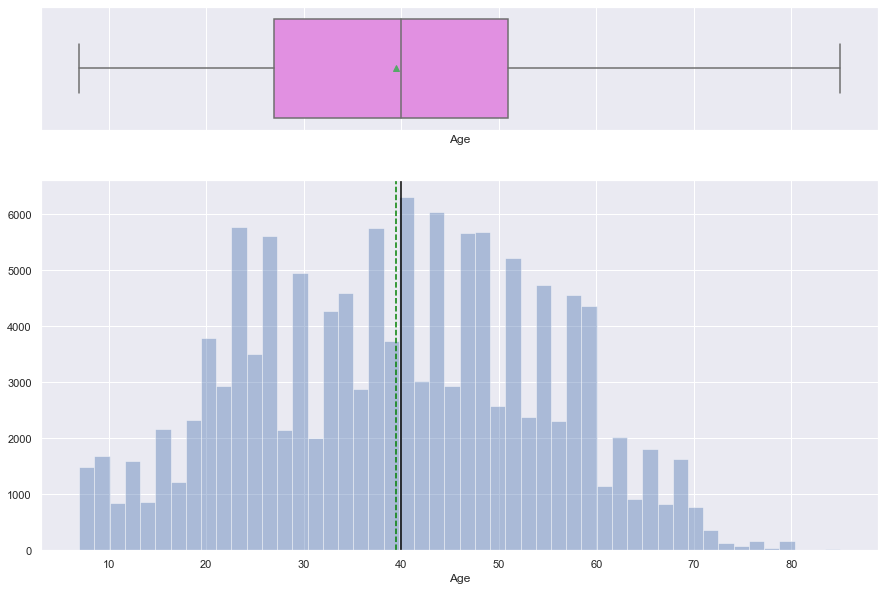

Travel_Distance
Skew : 0.47


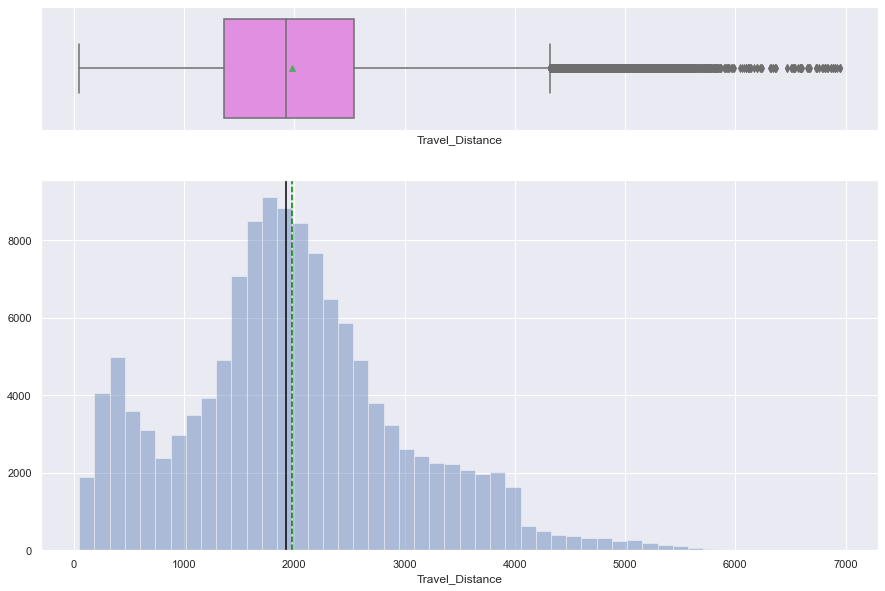

Departure_Delay_in_Mins
Skew : 6.82


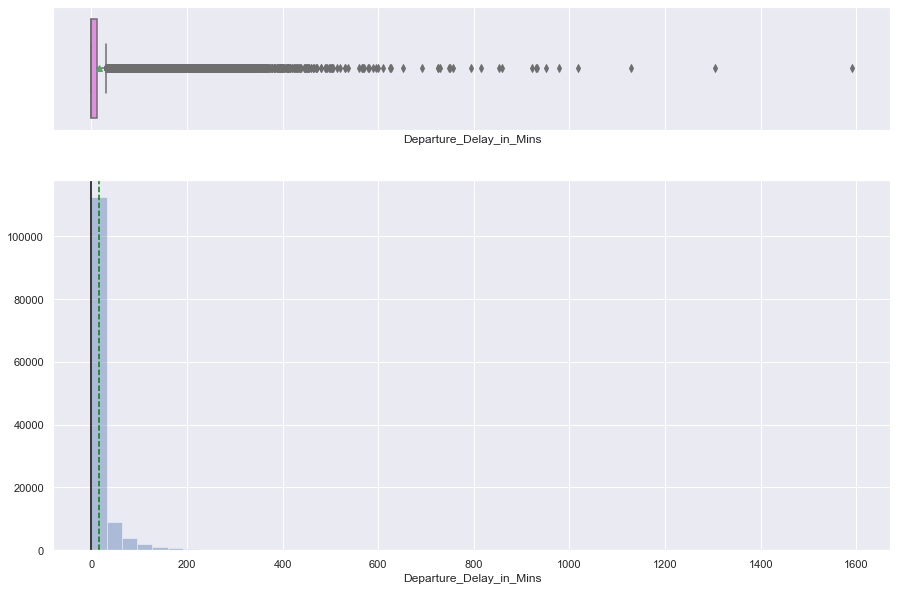

Arrival_Delay_in_Mins
Skew : 6.68


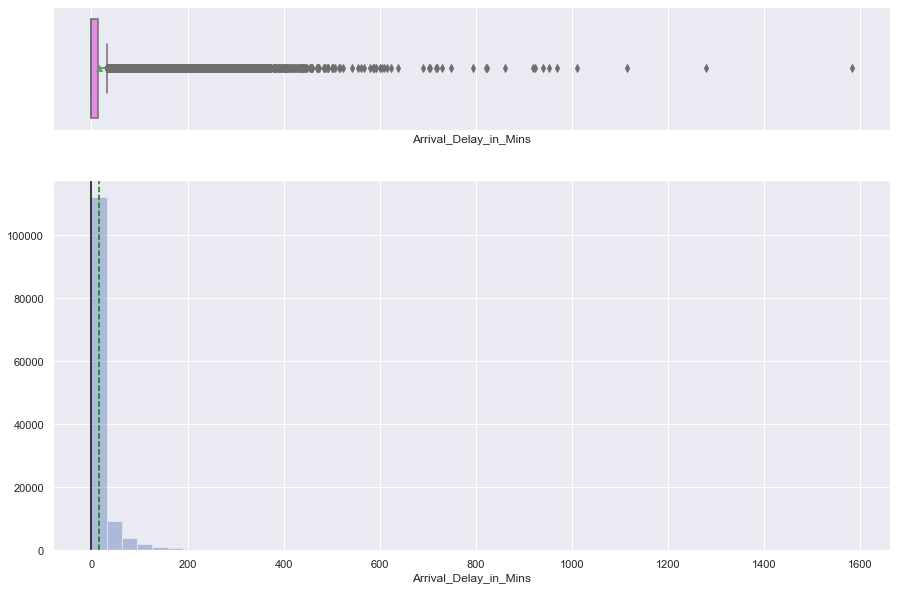

Arrival_Time_Convenient
Skew : -0.25


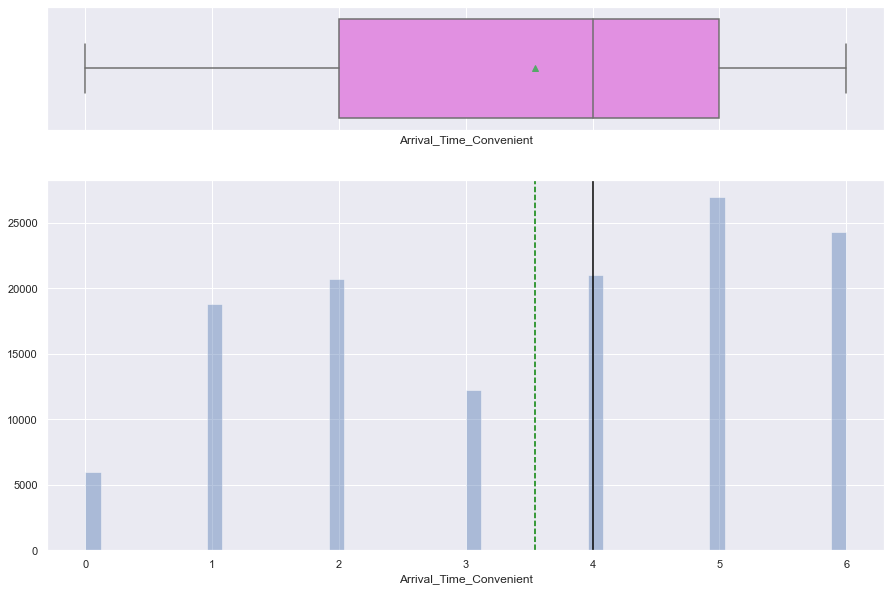

Catering
Skew : -0.14


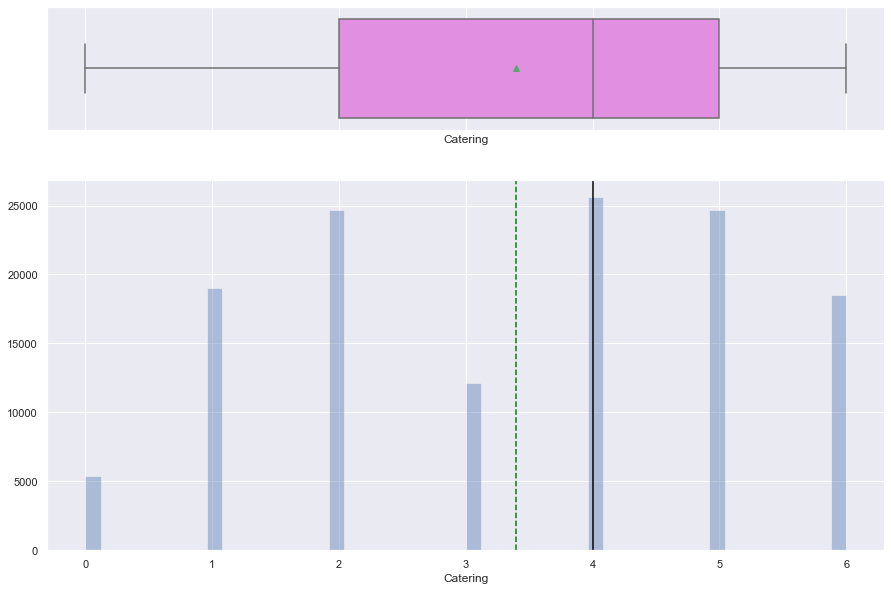

Platform_Location
Skew : -0.27


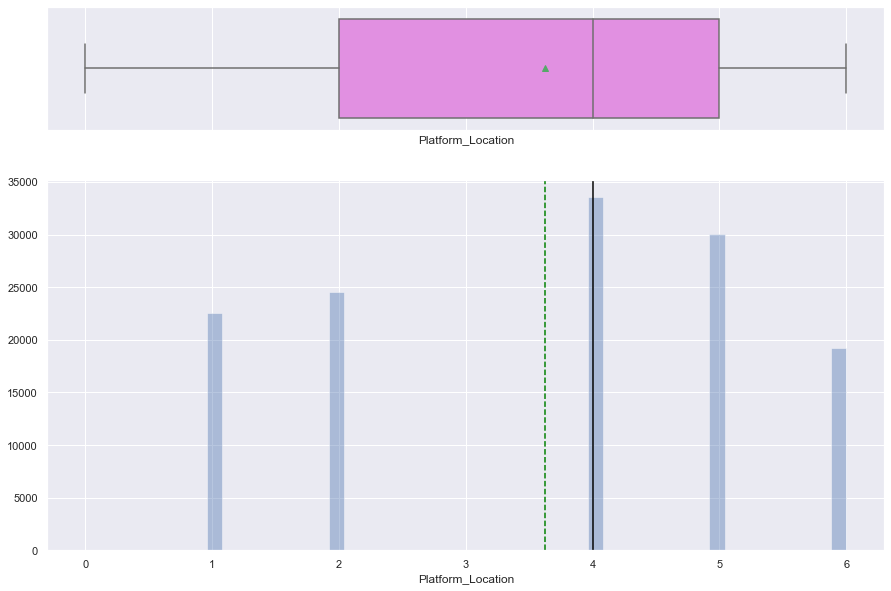

Onboard_Wifi_Service
Skew : -0.41


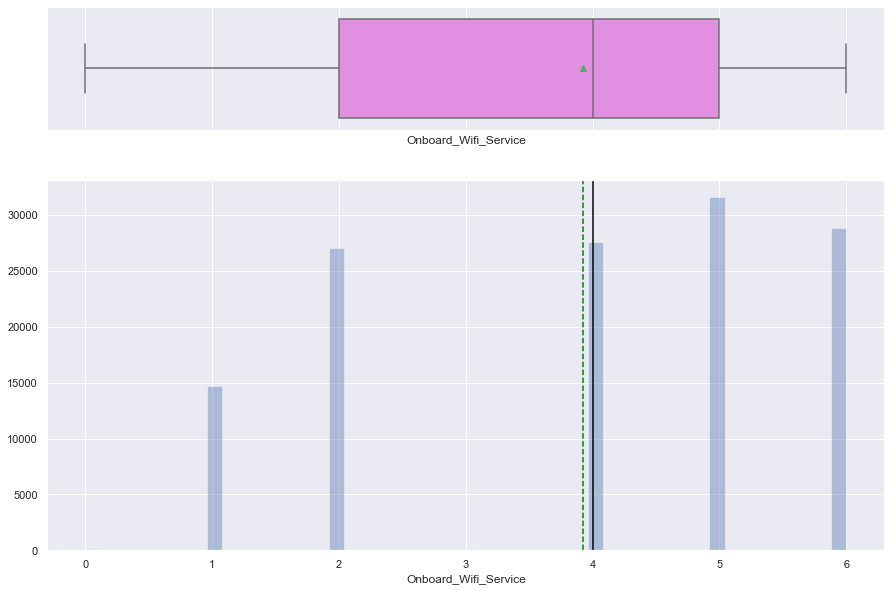

Onboard_Entertainment
Skew : -0.78


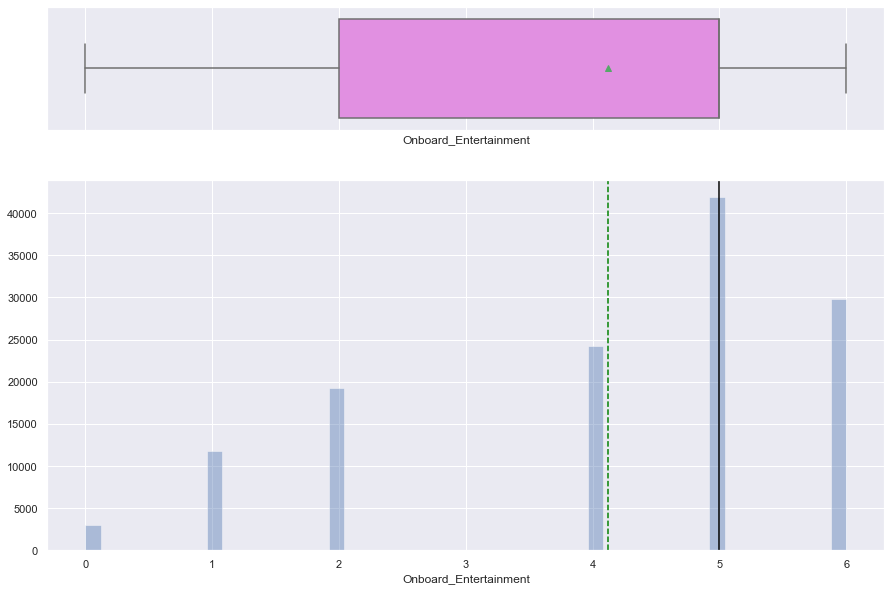

Online_Support
Skew : -0.8


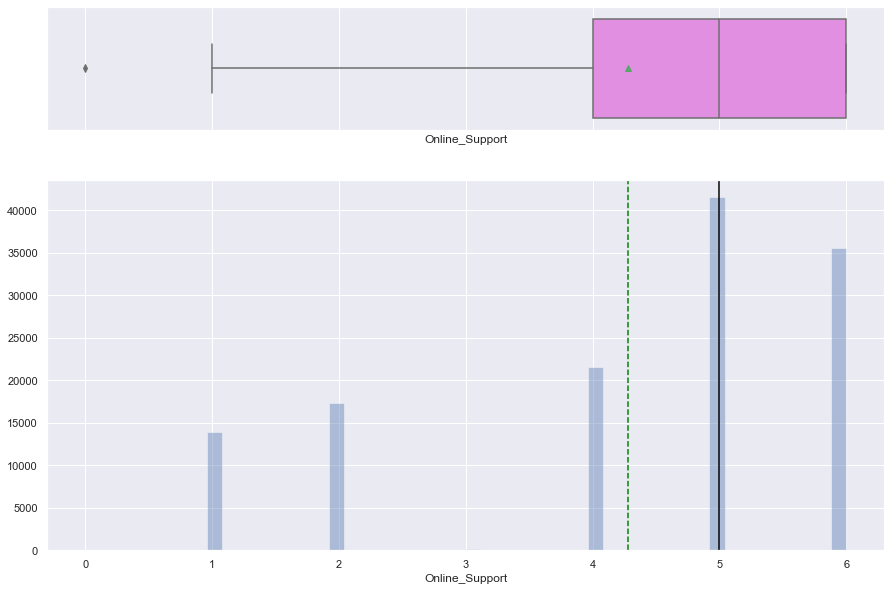

Ease_of_Online_Booking
Skew : -0.72


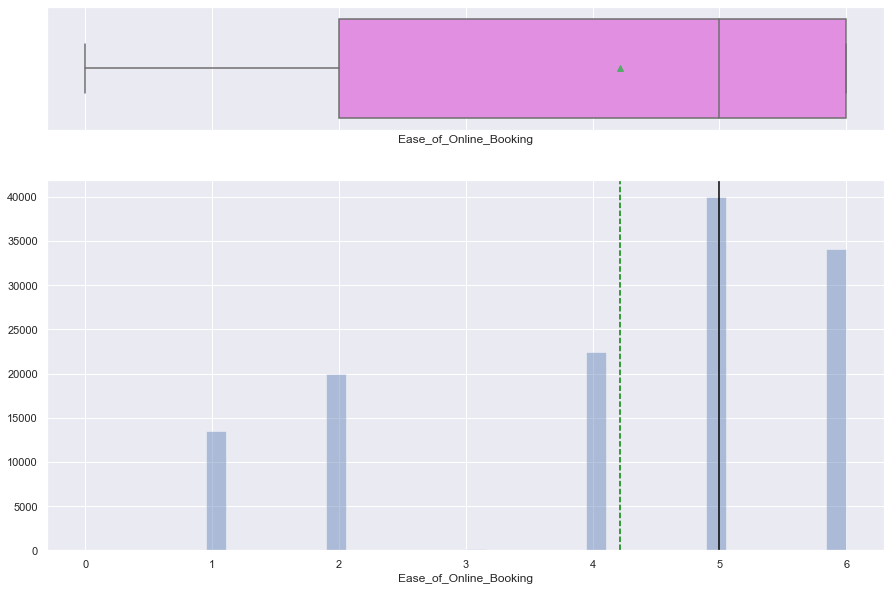

Onboard_Service
Skew : -0.61


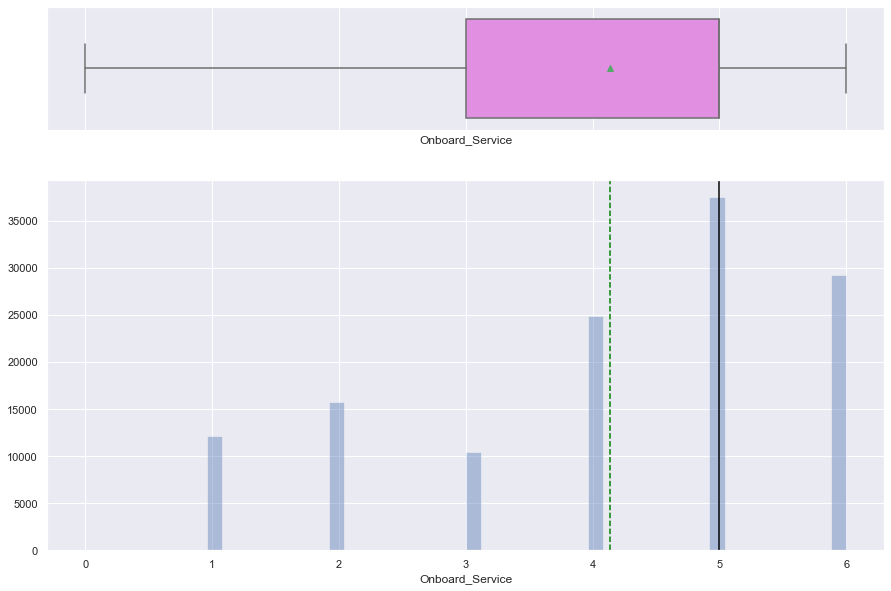

Legroom
Skew : -0.72


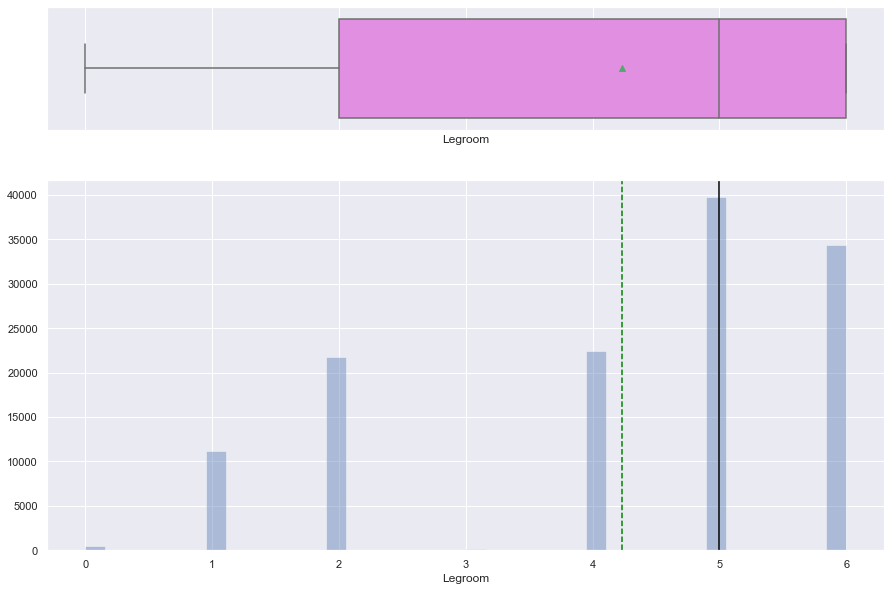

Baggage_Handling
Skew : -1.1


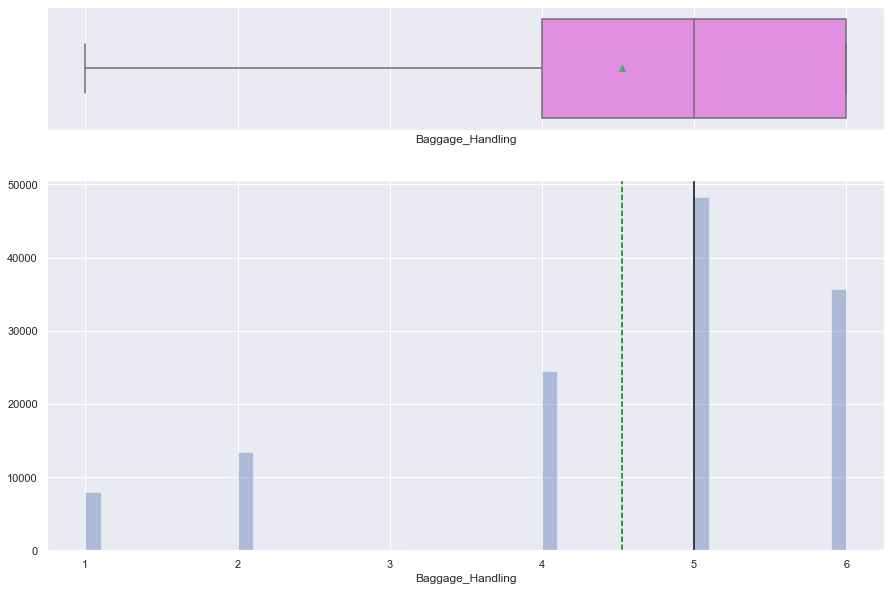

CheckIn_Service
Skew : -0.7


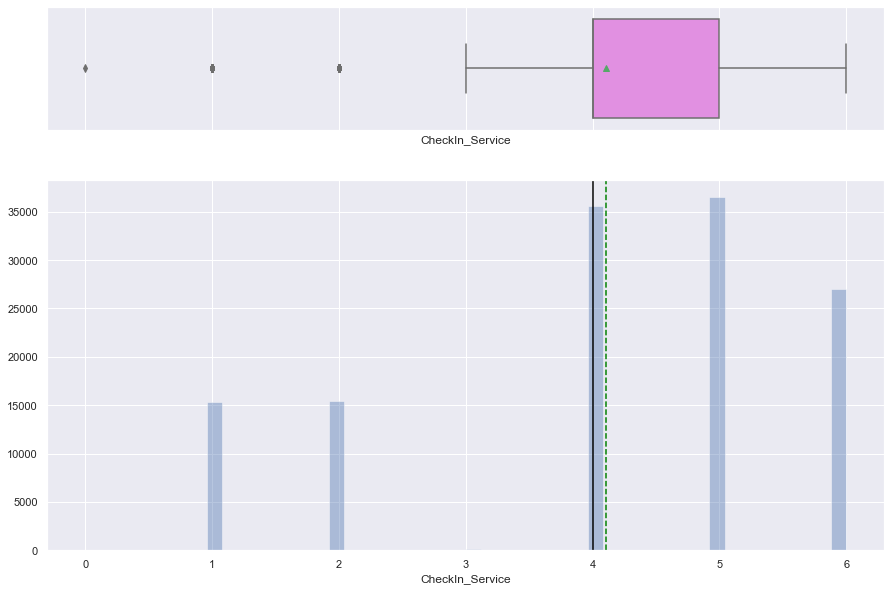

Cleanliness
Skew : -1.12


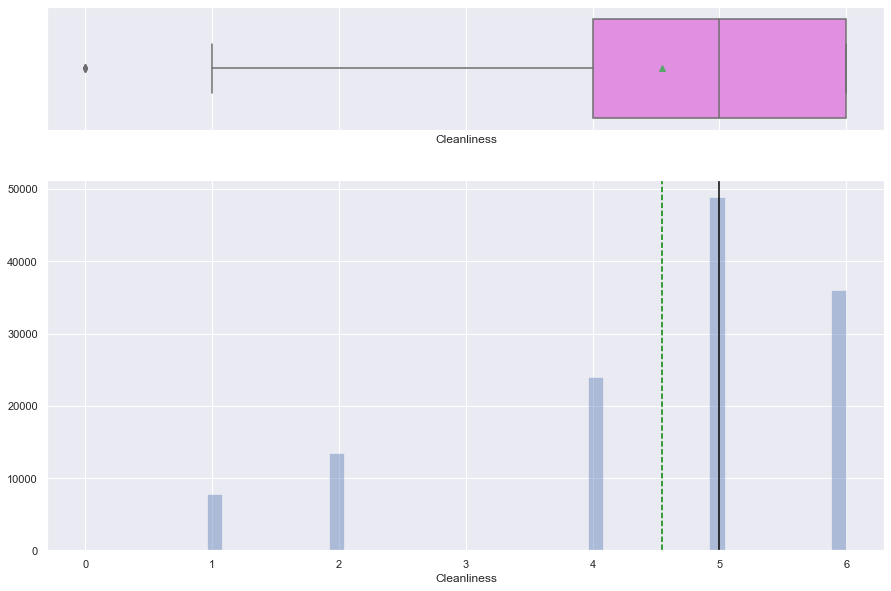

Online_Boarding
Skew : -0.63


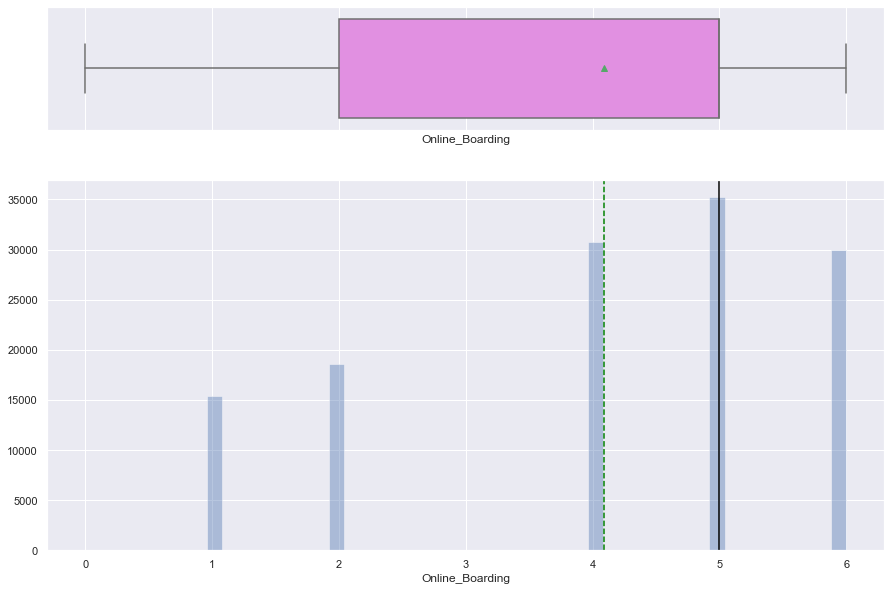

In [830]:
for col in cols_not_cat.columns:
    histogram_boxplot(cols_not_cat[col])

# Bivariate Analysis

In [831]:
independent_variables = df.loc[:,df.columns != 'Overall_Experience']

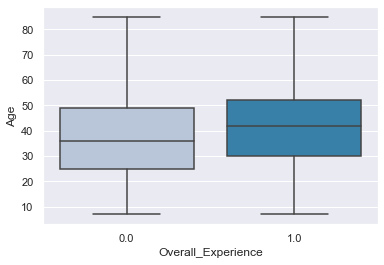

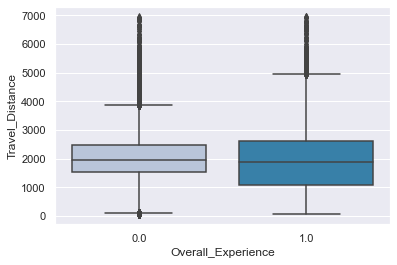

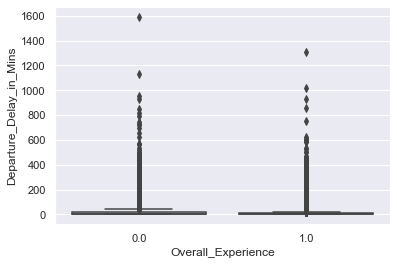

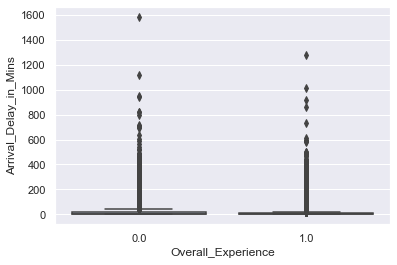

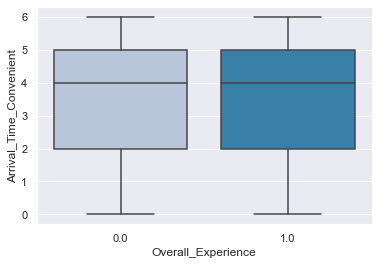

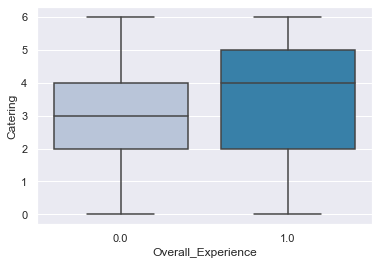

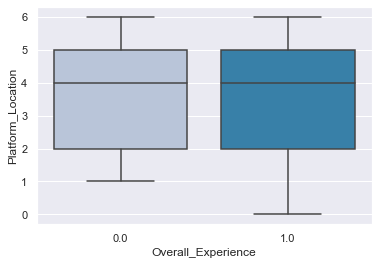

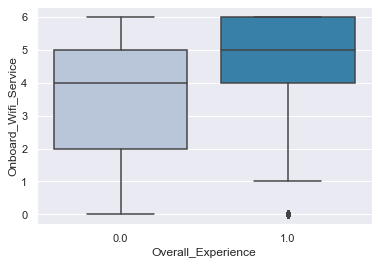

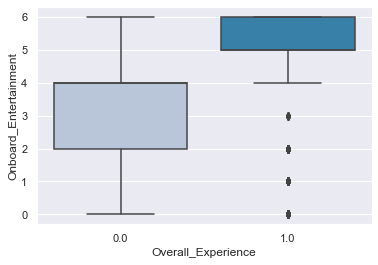

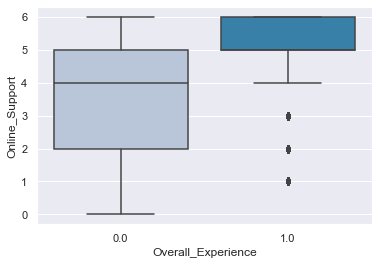

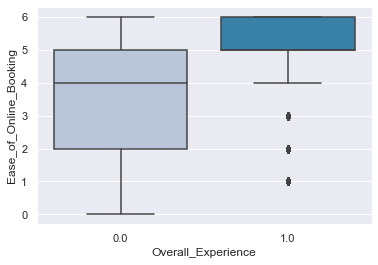

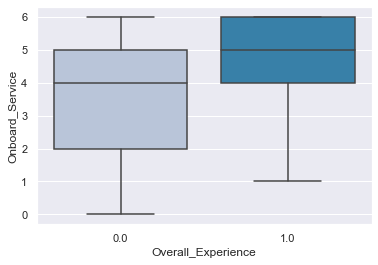

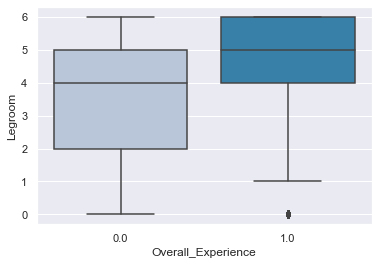

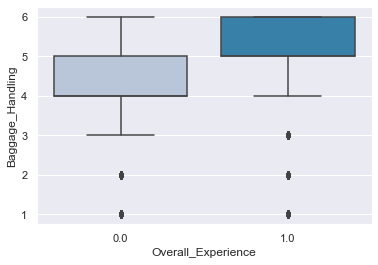

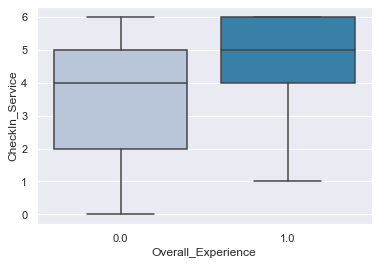

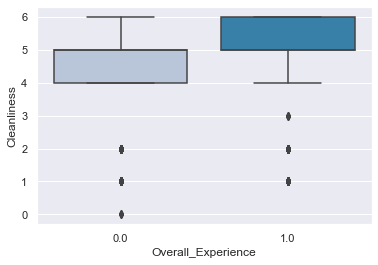

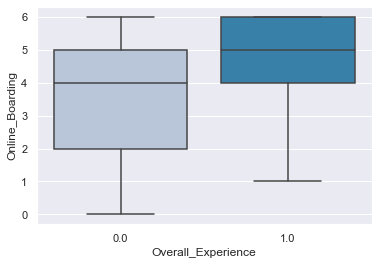

In [832]:
for col in cols_not_cat.columns:
    sns.boxplot(df["Overall_Experience"],cols_not_cat[col],palette="PuBu")
    plt.show()

In [833]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Overall_Experience'],margins=True)
    tab2 = pd.crosstab(x,df['Overall_Experience'],margins=True,normalize='index')
    print(tab1)
    print(tab2)    
    print('-'*120)
    tab = pd.crosstab(x,df['Overall_Experience'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Overall_Experience    0.0    1.0    All
Gender                                 
Female              16636  31179  47815
Male                26111  20376  46487
Unknown                39     38     77
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Gender                                
Female              0.347924  0.652076
Male                0.561684  0.438316
Unknown             0.506494  0.493506
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


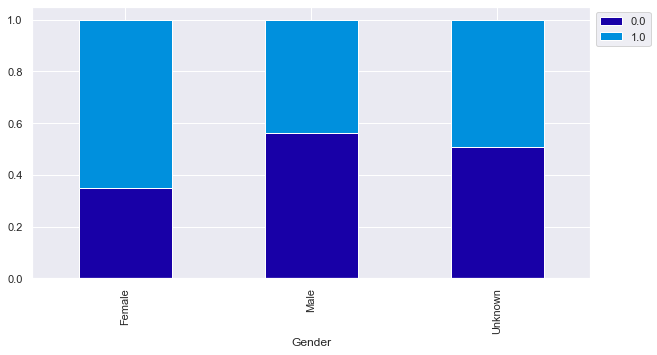

Overall_Experience    0.0    1.0    All
Customer_Type                          
Disloyal Customer   11869   3736  15605
Loyal Customer      26794  43029  69823
Unknown              4123   4828   8951
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Customer_Type                         
Disloyal Customer   0.760590  0.239410
Loyal Customer      0.383742  0.616258
Unknown             0.460619  0.539381
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


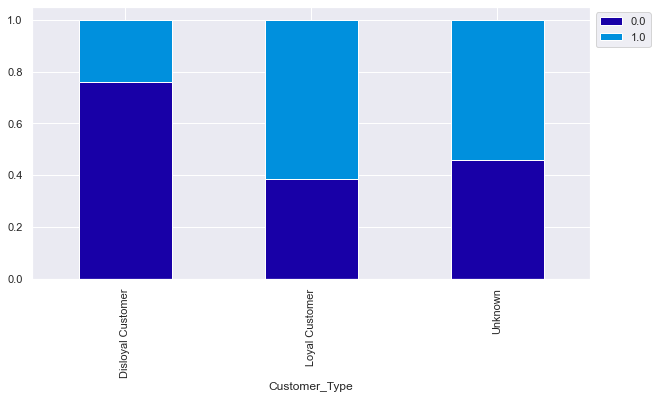

Overall_Experience    0.0    1.0    All
Age                                    
7.0                   280    225    505
8.0                   343    229    572
9.0                   381    259    640
10.0                  359    249    608
11.0                  343    268    611
...                   ...    ...    ...
78.0                   20     10     30
79.0                   32      7     39
80.0                   67     21     88
85.0                   12      6     18
All                 42786  51593  94379

[77 rows x 3 columns]
Overall_Experience       0.0       1.0
Age                                   
7.0                 0.554455  0.445545
8.0                 0.599650  0.400350
9.0                 0.595313  0.404687
10.0                0.590461  0.409539
11.0                0.561375  0.438625
...                      ...       ...
78.0                0.666667  0.333333
79.0                0.820513  0.179487
80.0                0.761364  0.238636
85.0                0.666667

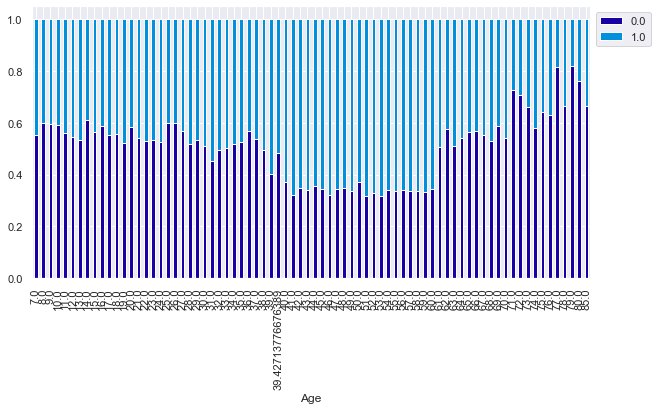

Overall_Experience    0.0    1.0    All
Type_Travel                            
Business Travel     24441  34176  58617
Personal Travel     14159  12377  26536
Unknown              4186   5040   9226
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Type_Travel                           
Business Travel     0.416961  0.583039
Personal Travel     0.533577  0.466423
Unknown             0.453718  0.546282
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


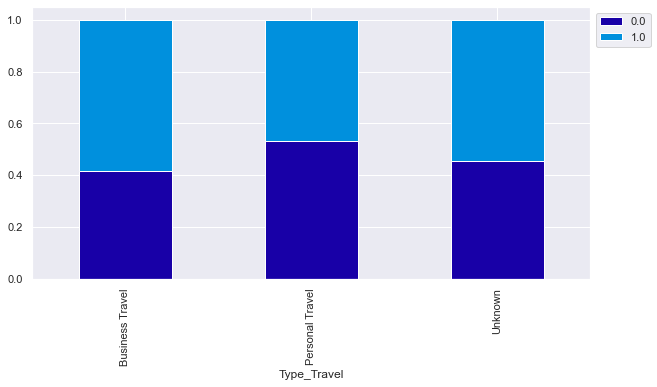

Overall_Experience    0.0    1.0    All
Travel_Class                           
Business            13142  31895  45037
Eco                 29644  19698  49342
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Travel_Class                          
Business            0.291805  0.708195
Eco                 0.600786  0.399214
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


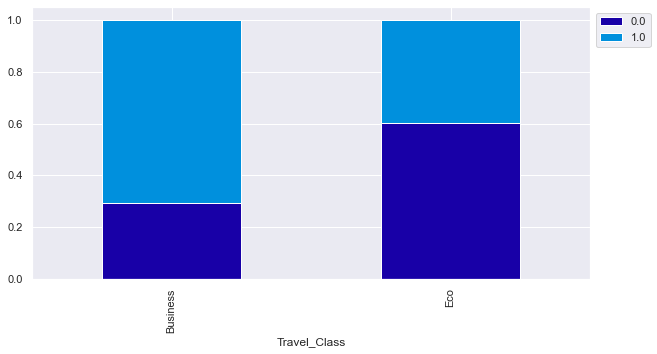

Overall_Experience    0.0    1.0    All
Travel_Distance                        
50                      2     11     13
51                      4     10     14
52                      2     16     18
53                      6     15     21
54                      4      9     13
...                   ...    ...    ...
6924                    1      0      1
6948                    0      1      1
6950                    0      1      1
6951                    1      0      1
All                 42786  51593  94379

[5211 rows x 3 columns]
Overall_Experience       0.0       1.0
Travel_Distance                       
50                  0.153846  0.846154
51                  0.285714  0.714286
52                  0.111111  0.888889
53                  0.285714  0.714286
54                  0.307692  0.692308
...                      ...       ...
6924                1.000000  0.000000
6948                0.000000  1.000000
6950                0.000000  1.000000
6951                1.0000

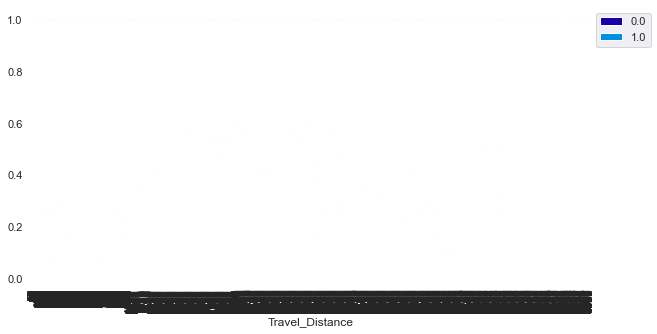

Overall_Experience         0.0    1.0    All
Departure_Delay_in_Mins                     
0.0                      22880  30516  53396
1.0                       1181   1553   2734
2.0                        881   1215   2096
3.0                        828   1010   1838
4.0                        752    889   1641
...                        ...    ...    ...
1017.0                       0      1      1
1128.0                       1      0      1
1305.0                       0      1      1
1592.0                       1      0      1
All                      42786  51593  94379

[438 rows x 3 columns]
Overall_Experience            0.0       1.0
Departure_Delay_in_Mins                    
0.0                      0.428497  0.571503
1.0                      0.431968  0.568032
2.0                      0.420324  0.579676
3.0                      0.450490  0.549510
4.0                      0.458257  0.541743
...                           ...       ...
1017.0                   0.000000  1.00

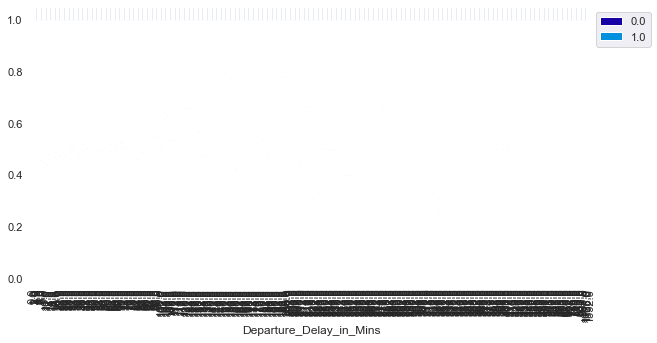

Overall_Experience       0.0    1.0    All
Arrival_Delay_in_Mins                     
0.0                    22069  31203  53272
1.0                      802   1193   1995
2.0                      798   1101   1899
3.0                      686   1071   1757
4.0                      725    988   1713
...                      ...    ...    ...
1011.0                     0      1      1
1115.0                     1      0      1
1280.0                     0      1      1
1584.0                     1      0      1
All                    42786  51593  94379

[435 rows x 3 columns]
Overall_Experience          0.0       1.0
Arrival_Delay_in_Mins                    
0.0                    0.414270  0.585730
1.0                    0.402005  0.597995
2.0                    0.420221  0.579779
3.0                    0.390438  0.609562
4.0                    0.423234  0.576766
...                         ...       ...
1011.0                 0.000000  1.000000
1115.0                 1.000000  0.0000

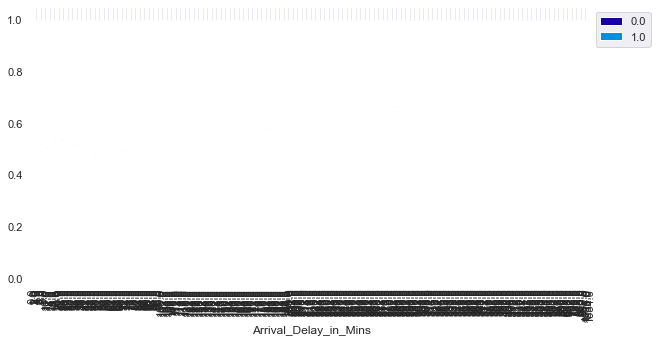

Overall_Experience    0.0    1.0    All
dataset_type_x                         
train               42786  51593  94379
All                 42786  51593  94379
Overall_Experience       0.0       1.0
dataset_type_x                        
train               0.453342  0.546658
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


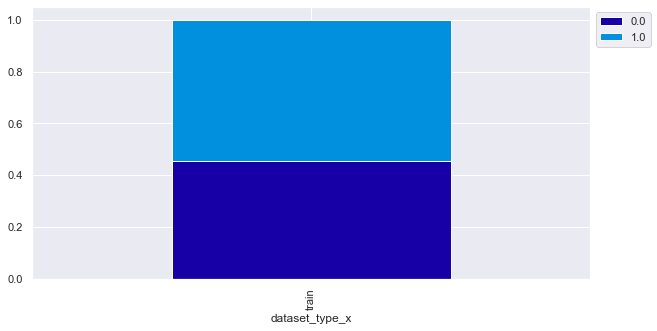

Overall_Experience    0.0    1.0    All
Seat_Comfort                           
Acceptable          13669   7489  21158
Excellent              96  12875  12971
Extremely Poor          8   3455   3463
Good                 7181  13414  20595
Needs Improvement   13464   7482  20946
Poor                 8339   6846  15185
All                 42757  51561  94318
Overall_Experience       0.0       1.0
Seat_Comfort                          
Acceptable          0.646044  0.353956
Excellent           0.007401  0.992599
Extremely Poor      0.002310  0.997690
Good                0.348677  0.651323
Needs Improvement   0.642796  0.357204
Poor                0.549160  0.450840
All                 0.453328  0.546672
------------------------------------------------------------------------------------------------------------------------


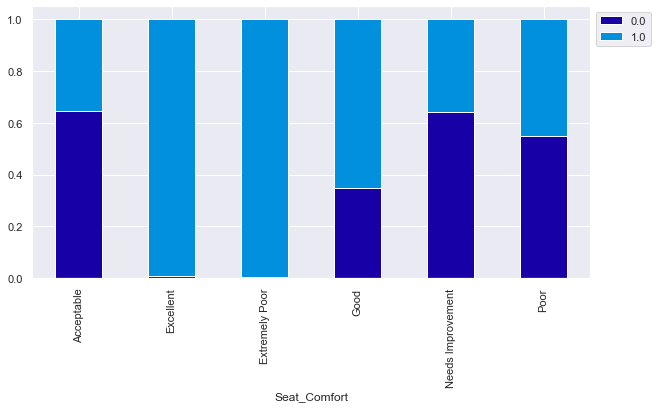

Overall_Experience    0.0    1.0    All
Seat_Class                             
Green Car           21434  26001  47435
Ordinary            21352  25592  46944
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Seat_Class                            
Green Car           0.451860  0.548140
Ordinary            0.454840  0.545160
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


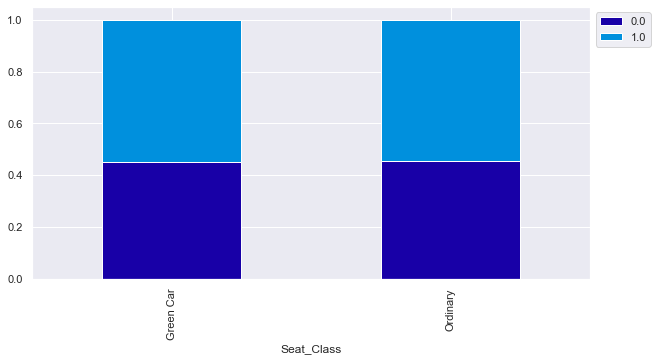

Overall_Experience         0.0    1.0    All
Arrival_Time_Convenient                     
0                         1981   2351   4332
1                         5638   8054  13692
2                         6952   8038  14990
3                         3992   4938   8930
4                         7050   8127  15177
5                         9307  10267  19574
6                         7866   9818  17684
All                      42786  51593  94379
Overall_Experience            0.0       1.0
Arrival_Time_Convenient                    
0                        0.457295  0.542705
1                        0.411773  0.588227
2                        0.463776  0.536224
3                        0.447032  0.552968
4                        0.464519  0.535481
5                        0.475478  0.524522
6                        0.444809  0.555191
All                      0.453342  0.546658
--------------------------------------------------------------------------------------------------------------

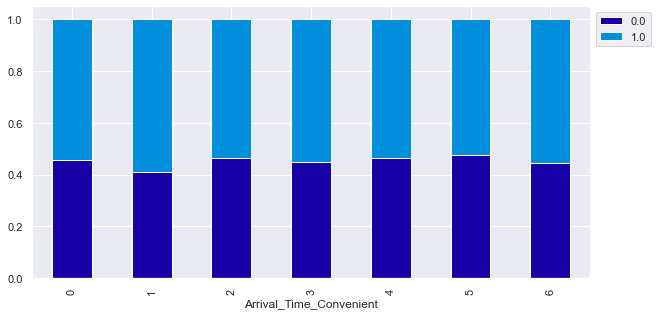

Overall_Experience    0.0    1.0    All
Catering                               
0                     879   3031   3910
1                    6814   7044  13858
2                   10226   7752  17978
3                    3947   4794   8741
4                   10574   7894  18468
5                    7401  10568  17969
6                    2945  10510  13455
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Catering                              
0                   0.224808  0.775192
1                   0.491702  0.508298
2                   0.568806  0.431194
3                   0.451550  0.548450
4                   0.572558  0.427442
5                   0.411876  0.588124
6                   0.218878  0.781122
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


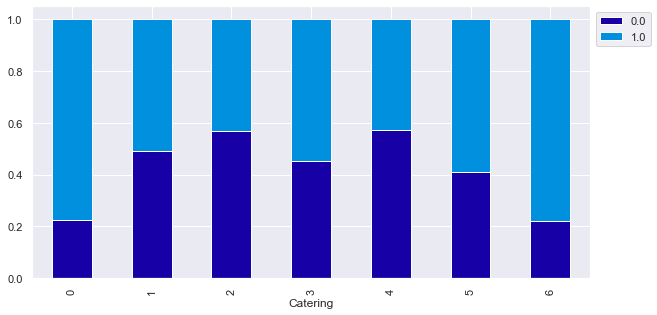

Overall_Experience    0.0    1.0    All
Platform_Location                      
0                       0      2      2
1                    6422  10027  16449
2                    7504  10328  17832
3                      13     17     30
4                   12985  11188  24173
5                   11009  10903  21912
6                    4853   9128  13981
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Platform_Location                     
0                   0.000000  1.000000
1                   0.390419  0.609581
2                   0.420817  0.579183
3                   0.433333  0.566667
4                   0.537170  0.462830
5                   0.502419  0.497581
6                   0.347114  0.652886
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


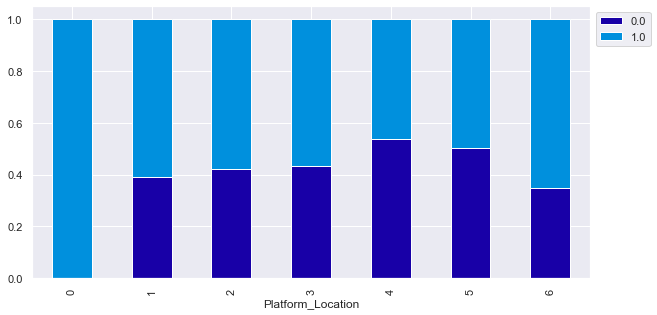

Overall_Experience      0.0    1.0    All
Onboard_Wifi_Service                     
0                        56     35     91
1                      7908   2833  10741
2                      9767   9829  19596
3                        13     17     30
4                      9857  10261  20118
5                      8235  14600  22835
6                      6950  14018  20968
All                   42786  51593  94379
Overall_Experience         0.0       1.0
Onboard_Wifi_Service                    
0                     0.615385  0.384615
1                     0.736244  0.263756
2                     0.498418  0.501582
3                     0.433333  0.566667
4                     0.489959  0.510041
5                     0.360631  0.639369
6                     0.331457  0.668543
All                   0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


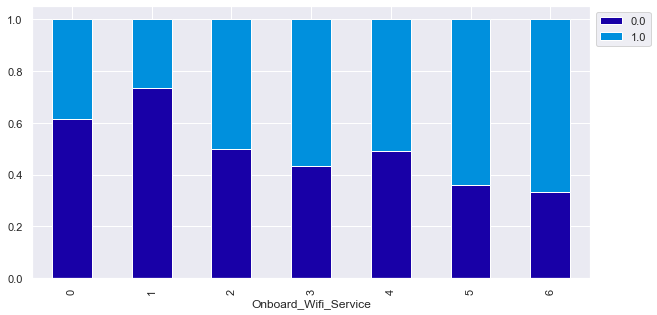

Overall_Experience       0.0    1.0    All
Onboard_Entertainment                     
0                        739   1405   2144
1                       6805   1836   8641
2                      11589   2337  13926
3                          8     10     18
4                      14075   3485  17560
5                       8548  21898  30446
6                       1022  20622  21644
All                    42786  51593  94379
Overall_Experience          0.0       1.0
Onboard_Entertainment                    
0                      0.344683  0.655317
1                      0.787525  0.212475
2                      0.832184  0.167816
3                      0.444444  0.555556
4                      0.801538  0.198462
5                      0.280759  0.719241
6                      0.047219  0.952781
All                    0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


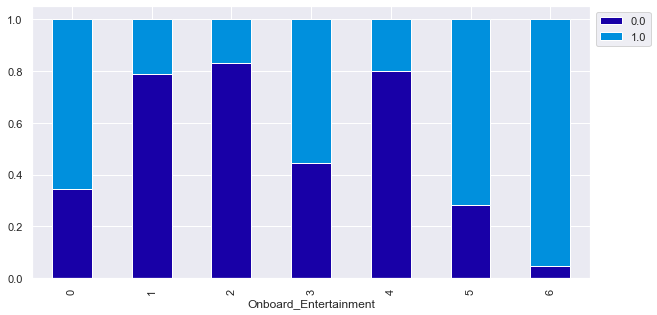

Overall_Experience    0.0    1.0    All
Online_Support                         
0                       1      0      1
1                    7205   2962  10167
2                    8790   3718  12508
3                      31     60     91
4                   11300   4402  15702
5                    9582  20434  30016
6                    5877  20017  25894
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Online_Support                        
0                   1.000000  0.000000
1                   0.708665  0.291335
2                   0.702750  0.297250
3                   0.340659  0.659341
4                   0.719654  0.280346
5                   0.319230  0.680770
6                   0.226964  0.773036
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


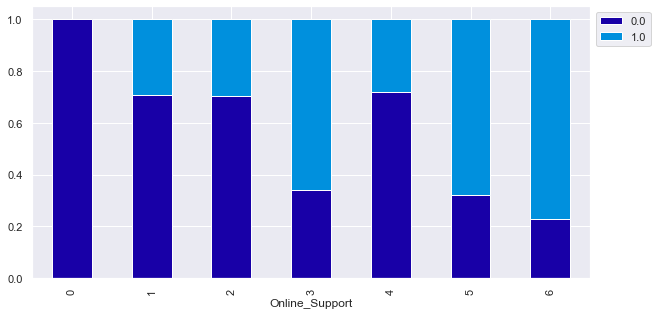

Overall_Experience        0.0    1.0    All
Ease_of_Online_Booking                     
0                          16      0     16
1                        7890   1878   9768
2                       10347   4132  14479
3                          23     50     73
4                       10559   5831  16390
5                        8115  20794  28909
6                        5836  18908  24744
All                     42786  51593  94379
Overall_Experience           0.0       1.0
Ease_of_Online_Booking                    
0                       1.000000  0.000000
1                       0.807740  0.192260
2                       0.714621  0.285379
3                       0.315068  0.684932
4                       0.644234  0.355766
5                       0.280708  0.719292
6                       0.235855  0.764145
All                     0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


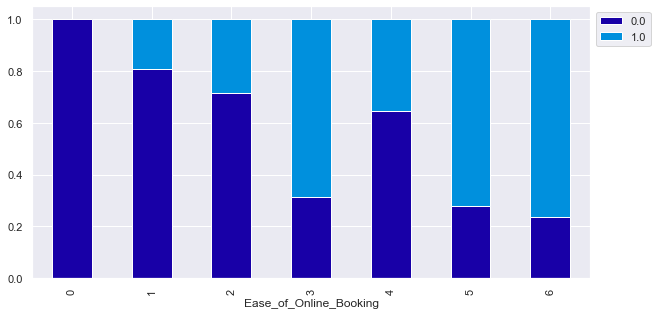

Overall_Experience    0.0    1.0    All
Onboard_Service                        
0                       4      0      4
1                    6425   2351   8776
2                    7547   3843  11390
3                    3445   4156   7601
4                   10708   7363  18071
5                    9625  17640  27265
6                    5032  16240  21272
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Onboard_Service                       
0                   1.000000  0.000000
1                   0.732110  0.267890
2                   0.662599  0.337401
3                   0.453230  0.546770
4                   0.592552  0.407448
5                   0.353017  0.646983
6                   0.236555  0.763445
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


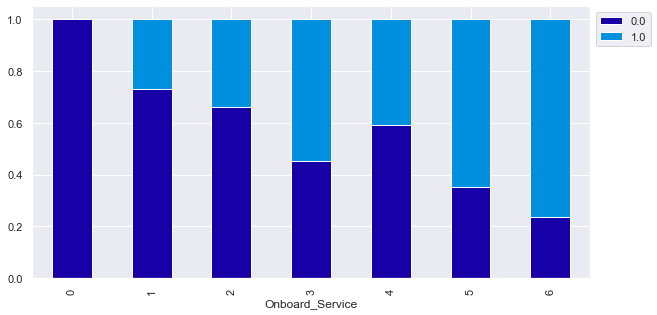

Overall_Experience    0.0    1.0    All
Legroom                                
0                     106    234    340
1                    5776   2334   8110
2                    9814   5939  15753
3                      36     54     90
4                   10321   6063  16384
5                    9488  19382  28870
6                    7245  17587  24832
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Legroom                               
0                   0.311765  0.688235
1                   0.712207  0.287793
2                   0.622992  0.377008
3                   0.400000  0.600000
4                   0.629944  0.370056
5                   0.328646  0.671354
6                   0.291761  0.708239
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


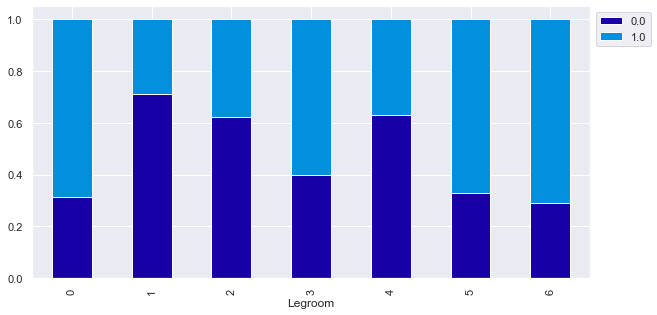

Overall_Experience    0.0    1.0    All
Baggage_Handling                       
1                    3311   2453   5764
2                    5875   3884   9759
3                      64     78    142
4                   12205   5562  17767
5                   14382  20562  34944
6                    6949  19054  26003
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Baggage_Handling                      
1                   0.574427  0.425573
2                   0.602008  0.397992
3                   0.450704  0.549296
4                   0.686948  0.313052
5                   0.411573  0.588427
6                   0.267238  0.732762
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


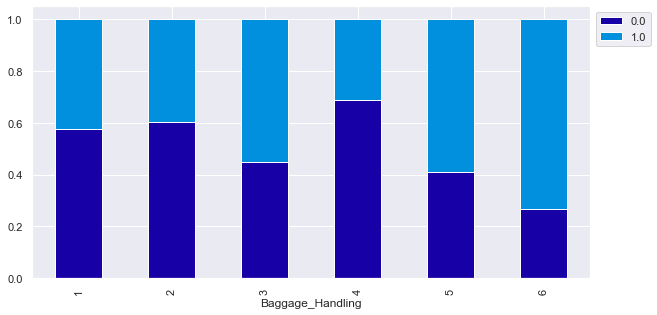

Overall_Experience    0.0    1.0    All
CheckIn_Service                        
0                       1      0      1
1                    7574   3563  11137
2                    7484   3734  11218
3                      34     43     77
4                   11194  14609  25803
5                   11263  15239  26502
6                    5236  14405  19641
All                 42786  51593  94379
Overall_Experience       0.0       1.0
CheckIn_Service                       
0                   1.000000  0.000000
1                   0.680075  0.319925
2                   0.667142  0.332858
3                   0.441558  0.558442
4                   0.433826  0.566174
5                   0.424987  0.575013
6                   0.266585  0.733415
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


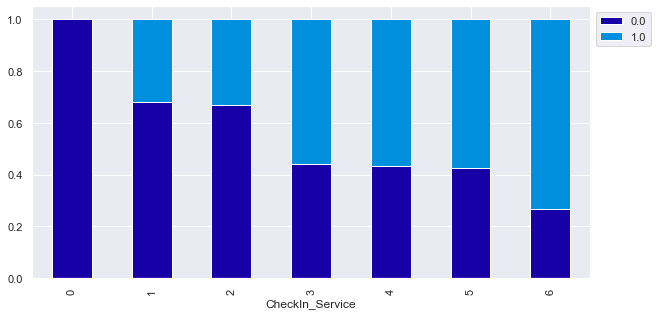

Overall_Experience    0.0    1.0    All
Cleanliness                            
0                       5      0      5
1                    3328   2305   5633
2                    5849   3957   9806
3                       0      6      6
4                   11859   5590  17449
5                   14678  20749  35427
6                    7067  18986  26053
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Cleanliness                           
0                   1.000000  0.000000
1                   0.590804  0.409196
2                   0.596472  0.403528
3                   0.000000  1.000000
4                   0.679638  0.320362
5                   0.414317  0.585683
6                   0.271255  0.728745
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


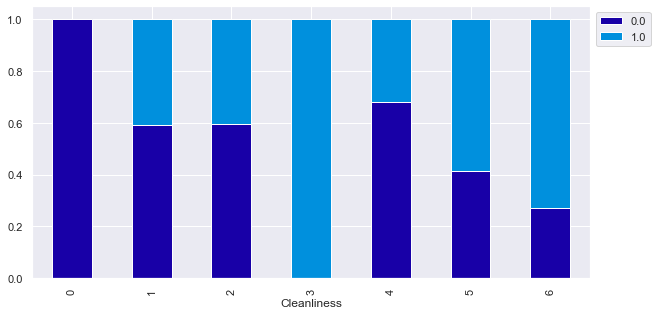

Overall_Experience    0.0    1.0    All
Online_Boarding                        
0                      12      0     12
1                    8249   2911  11160
2                    9674   3777  13451
3                       0      6      6
4                   10125  12350  22475
5                    8869  16664  25533
6                    5857  15885  21742
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Online_Boarding                       
0                   1.000000  0.000000
1                   0.739158  0.260842
2                   0.719203  0.280797
3                   0.000000  1.000000
4                   0.450501  0.549499
5                   0.347354  0.652646
6                   0.269386  0.730614
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


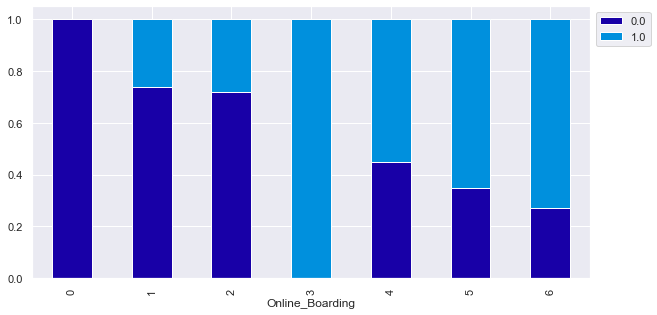

Overall_Experience    0.0    1.0    All
dataset_type_y                         
train               42786  51593  94379
All                 42786  51593  94379
Overall_Experience       0.0       1.0
dataset_type_y                        
train               0.453342  0.546658
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


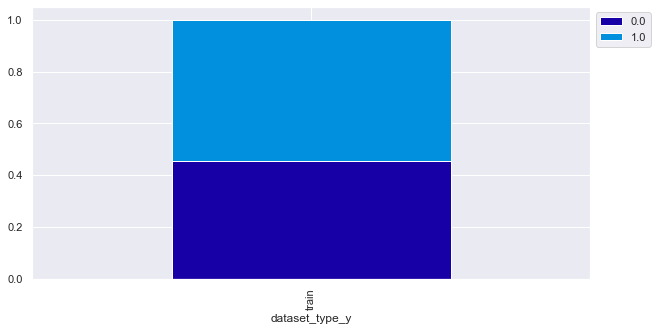

In [834]:
for col in independent_variables.columns:
    stacked_plot(independent_variables[col])
    plt.show()

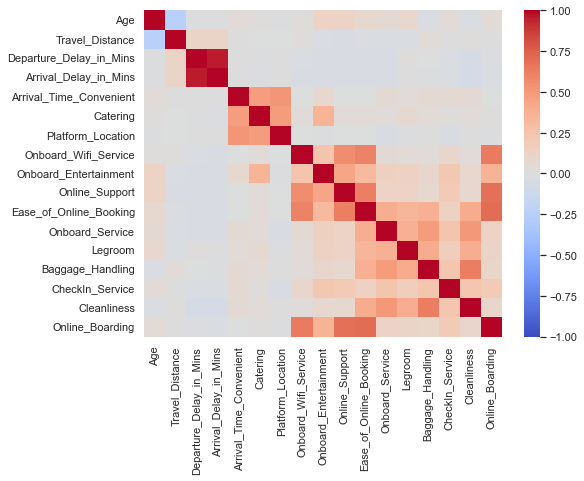

In [721]:
# Separating numerical variables
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

# Building correlation matrix for numerical columns
corr = df[numerical_col].corr()

# ploting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

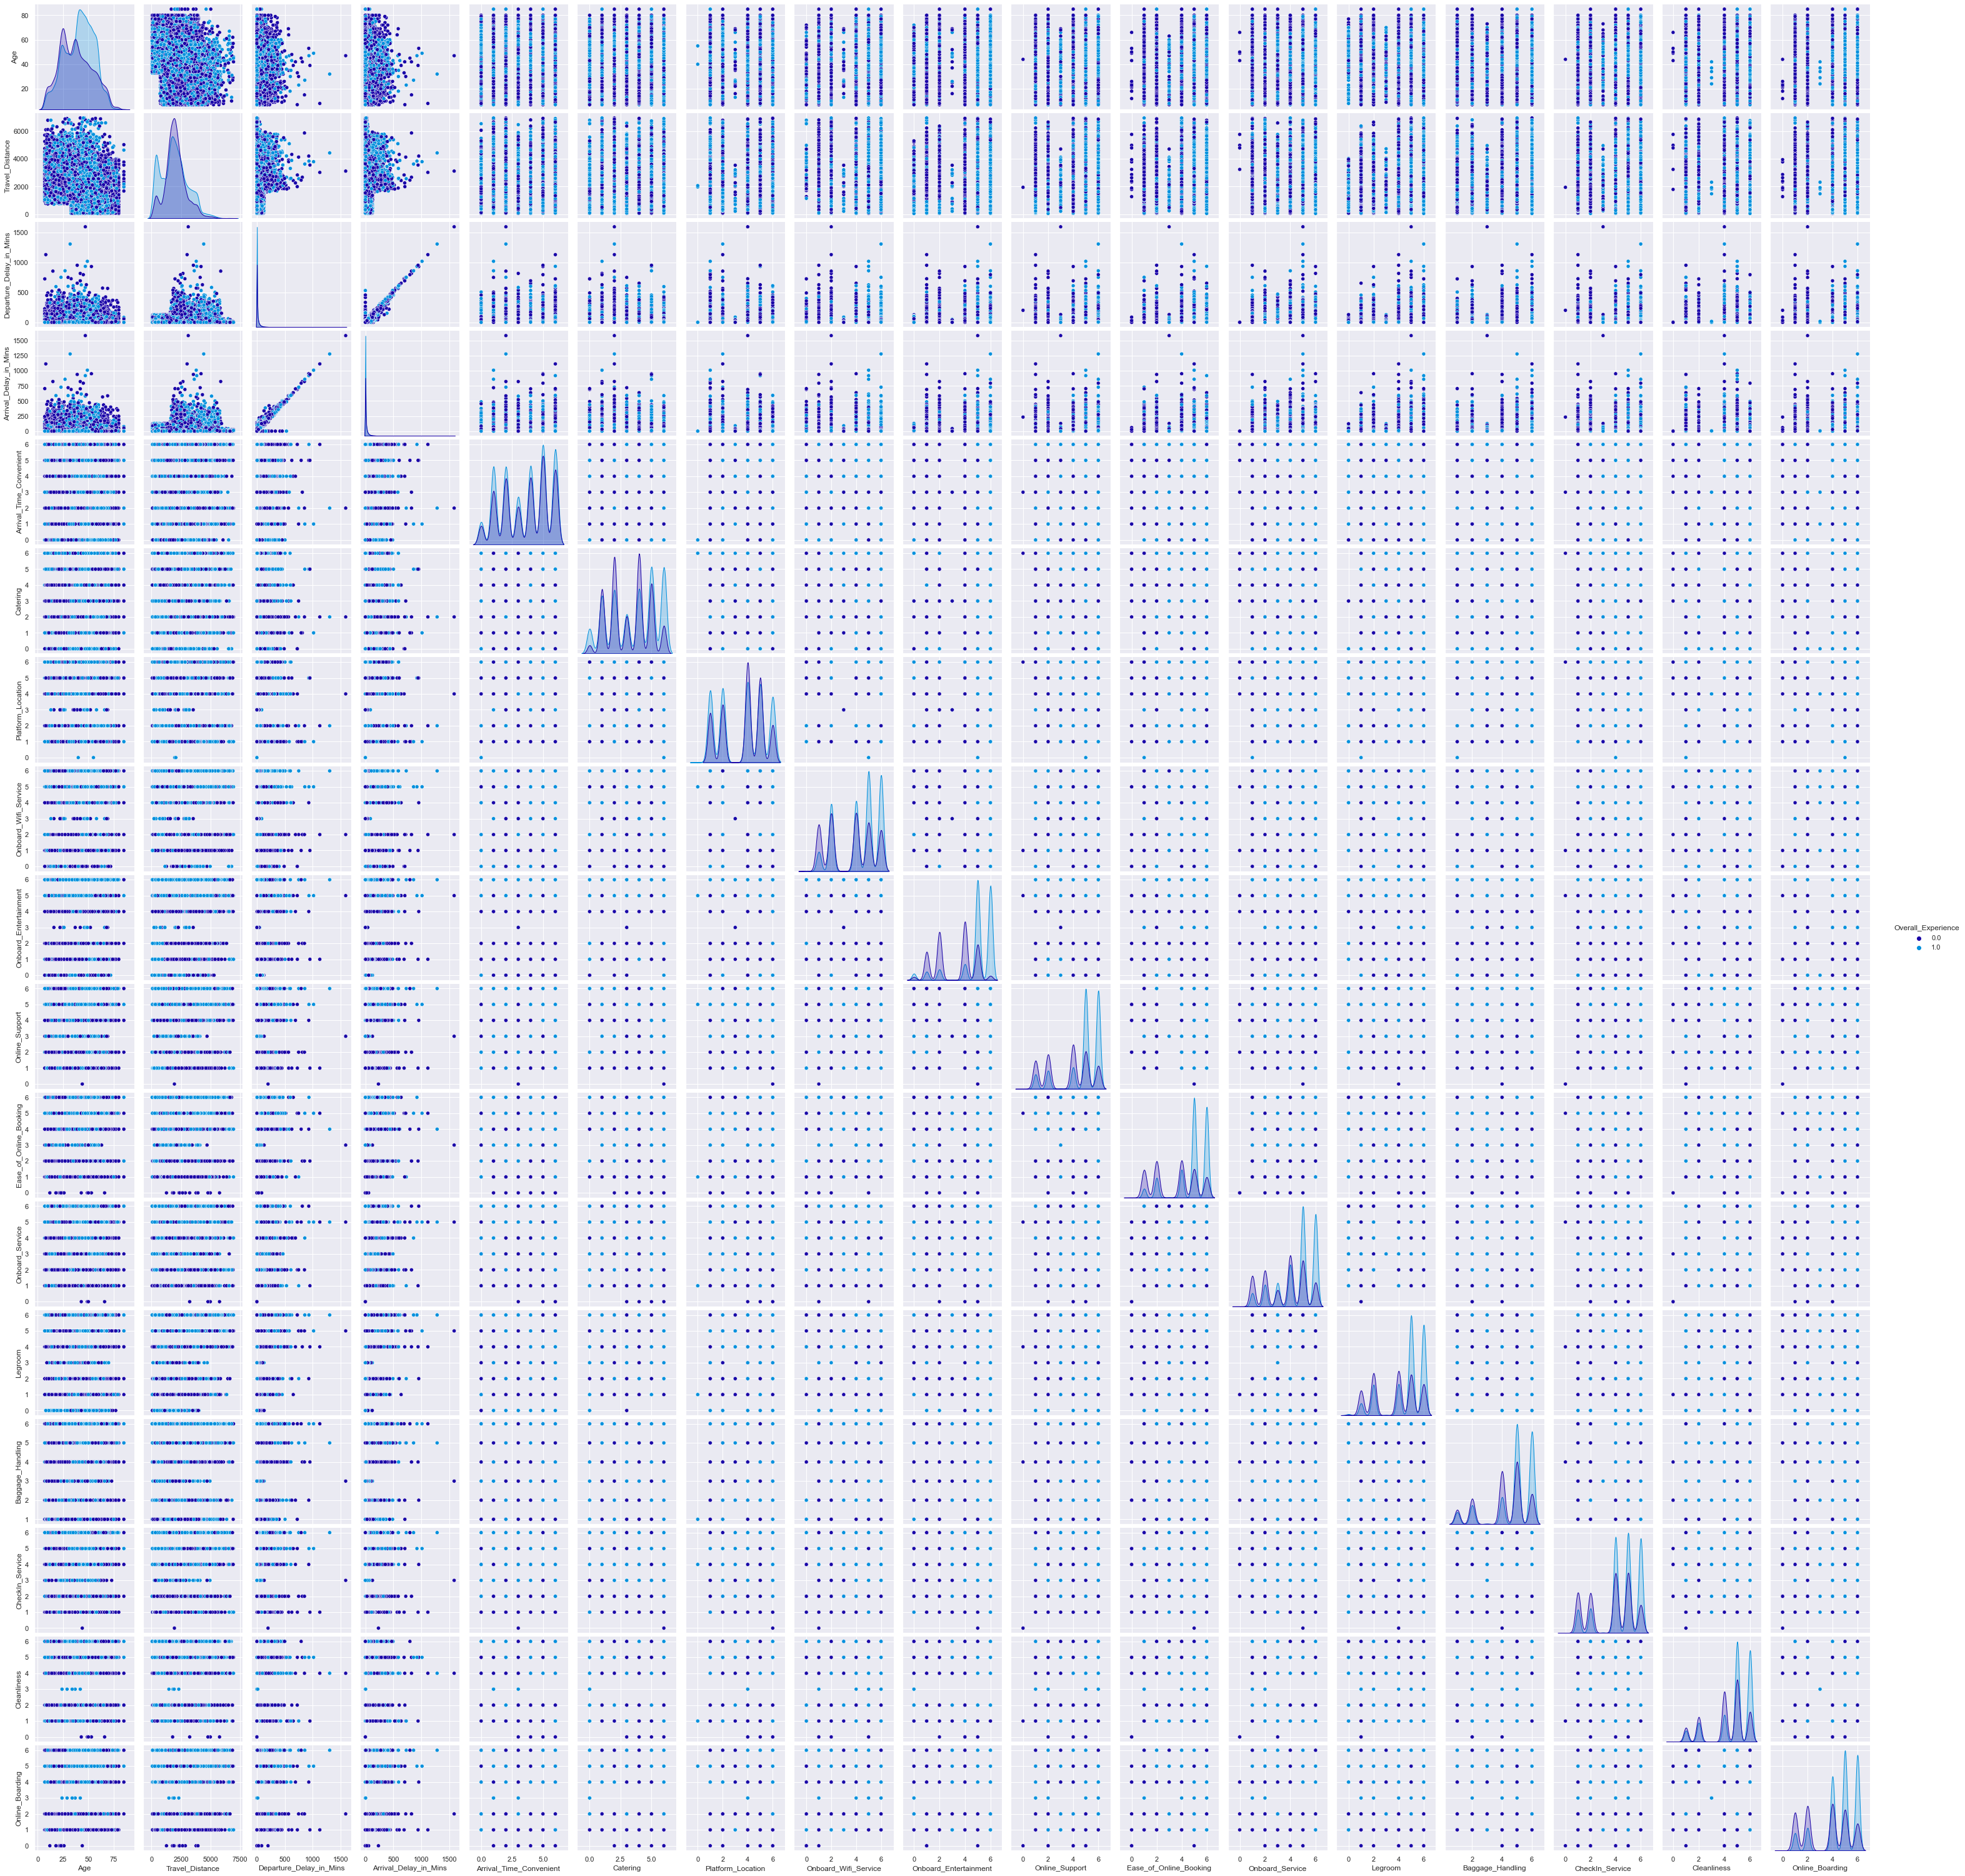

In [722]:
sns.pairplot(df, hue='Overall_Experience')

# Treatment of Outliers

We really need to be carefull here as we have a lot of features that are highly right skewed and some of them could be potential signal for our target variable:

- Departure/Arrival delays 
-> typically, if we go on a trip and the delays are very long we would tend to be disatisfied so we need to think about it, maybe we can cap it or create a new column where we could segment (less than 60 min, 60 min to 120 min, 120 min to 180 min, more than 180 min)


In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a variable
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1-IQR*1.5  #define lower whisker
    Upper_Whisker = Q3+IQR*1.5  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                             # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

## Replacing Outliers with Median Values

In this technique, we replace the extreme values with median values. It is advised to not use mean values as they are affected by outliers. The first line of code below prints the 50th percentile value, or the median, which comes out to be 140. The second line prints the 95th percentile value, which comes out to be around 326. The third line of code below replaces all those values in the 'Loan_amount' variable, which are greater than the 95th percentile, with the median value. Finally, the fourth line prints summary statistics after all these techniques have been employed for outlier treatment. (Ref: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers)

In [51]:
def outlier_treament(df,col):
    middle_num = (df[col].quantile(0.50)) 
    quartile_95 = (df[col].quantile(0.95)) 
    print('Median:',middle_num)
    treated_col = np.where(df[col] > quartile_95, middle_num, df[col])
    return treated_col

In [52]:
outline_col = ['Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',     
       'Online_Support', 'CheckIn_Service', 'Cleanliness']

In [53]:
# Treating the cols with the median values. 

for col_names in outline_col:
#     print(col_names)
    df[col_names] = outlier_treament(df,col_names)

Median: 1924.0
Median: 0.0
Median: 0.0
Median: 5.0
Median: 4.0
Median: 5.0


In [54]:
df.describe().T

count         mean         std   min     25%  \
Age                      129981.0    39.427138   15.119752   7.0    27.0   
Travel_Distance          129981.0  1859.492318  861.805374  50.0  1359.0   
Departure_Delay_in_Mins  129981.0     7.554366   14.989166   0.0     0.0   
Arrival_Delay_in_Mins    129981.0     7.782568   15.166861   0.0     0.0   
Arrival_Time_Convenient  129981.0     3.549234    1.877078   0.0     2.0   
Catering                 129981.0     3.395281    1.797290   0.0     2.0   
Platform_Location        129981.0     3.627676    1.732851   0.0     2.0   
Onboard_Wifi_Service     129981.0     3.926351    1.730175   0.0     2.0   
Onboard_Entertainment    129981.0     4.121633    1.732408   0.0     2.0   
Online_Support           129981.0     4.278287    1.683221   0.0     4.0   
Ease_of_Online_Booking   129981.0     4.213777    1.690962   0.0     2.0   
Onboard_Service          129981.0     4.133173    1.606272   0.0     3.0   
Legroom                  129981.0     4.228233    1.675313   0.0     2.0   
Baggage_Handling         129981.0     4.529224    1.468467   1.0     4.0   
CheckIn_Service          129981.0     4.102930    1.625472   0.0     4.0   
Cleanliness              129981.0     4.543056    1.462477   0.0     4.0   
Online_Boarding          129981.0     4.091167    1.680357   0.0     2.0   

                            50%     75%     max  
Age                        40.0    51.0    85.0  
Travel_Distance          1924.0  2389.0  3831.0  
Departure_Delay_in_Mins     0.0     8.0    77.0  
Arrival_Delay_in_Mins       0.0     8.0    78.0  
Arrival_Time_Convenient     4.0     5.0     6.0  
Catering                    4.0     5.0     6.0  
Platform_Location           4.0     5.0     6.0  
Onboard_Wifi_Service        4.0     5.0     6.0  
Onboard_Entertainment       5.0     5.0     6.0  
Online_Support              5.0     6.0     6.0  
Ease_of_Online_Booking      5.0     6.0     6.0  
Onboard_Service             5.0     5.0     6.0  
Legroom                     5.0     6.0     6.0  
Baggage_Handling            5.0     6.0     6.0  
CheckIn_Service             4.0     5.0     6.0  
Cleanliness                 5.0     6.0     6.0  
Online_Boarding             5.0     5.0     6.0

# Modeling part

### Data Preparation

In [55]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

X = df.drop(columns = 'Overall_Experience')
# reminder 1 = satisfied, 0 = unsatisfied 

# Create dummy variables for the categorical variables 
X = pd.get_dummies(X, drop_first=True)

y = df[['Overall_Experience','dataset_type_x']]

In [56]:
#scaler = StandardScaler()
#scaler = MinMaxScaler()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Applying fit_transform on the training features data
X_scale = scaler.fit_transform(X)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
X_scale = pd.DataFrame(X_scale, index = X.index, columns = X.columns)

#change the X data to the Xscale data
X = X_scale

## Separating the data sets to the initial train and test datasets

In [57]:
#split out the test and train data sets
X = X.loc[df['dataset_type_x'] == 'train']
X.drop(columns=['dataset_type_x_train','dataset_type_y_train'],axis=1,inplace=True)
solution_test = X.loc[df['dataset_type_x'] == 'test']
#drop the test data from y
y = y[y['dataset_type_x']=='train']
y.drop(columns=['dataset_type_x'],axis=1,inplace=True)

## Model Evaluation Criterion

In [58]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Satisfied', 'Not Satisfied'], yticklabels=['Satisfied', 'Not Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1)

### **MODEL 1 - Logistic Regression** 

In [106]:
# Defining the Logistic regression model
log_reg = LogisticRegression()

# Fitting the model on the training data 
log_reg.fit(X_train,y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     38526
         1.0       0.89      0.89      0.89     46415

    accuracy                           0.88     84941
   macro avg       0.88      0.88      0.88     84941
weighted avg       0.88      0.88      0.88     84941



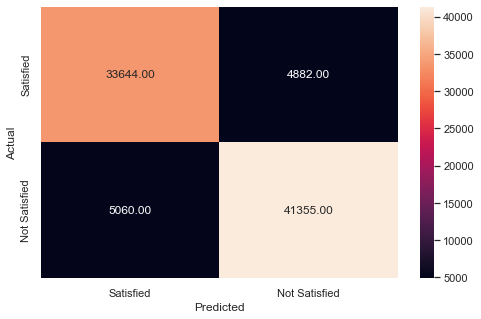

In [107]:
#Predict for train set
y_pred_train = log_reg.predict(X_train)

metrics_score(y_train, y_pred_train)

In [108]:
y_pred_train

array([1., 0., 0., ..., 1., 1., 0.])

#### Checking the performance on the test dataset

In [109]:
# Defining the Logistic regression model
log_reg = LogisticRegression()

# Fitting the model on the test data 
log_reg.fit(X_test,y_test)

LogisticRegression()

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      4260
         1.0       0.89      0.90      0.90      5178

    accuracy                           0.88      9438
   macro avg       0.88      0.88      0.88      9438
weighted avg       0.88      0.88      0.88      9438



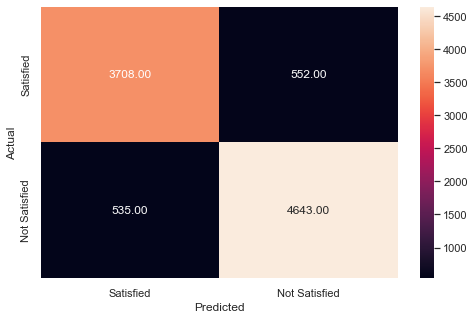

In [110]:
#Predict for test set
y_pred_test = log_reg.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

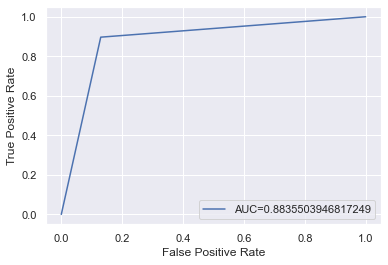

In [111]:
#define metrics
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_test)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [112]:
# Printing the coefficients of logistic regression
pd.Series(log_reg.coef_[0], index = X_train.columns).sort_values(ascending = False)

Seat_Comfort_Extremely Poor       7.463469
Seat_Comfort_Excellent            5.397134
Customer_Type_Loyal Customer      2.120416
Onboard_Entertainment             1.761881
Customer_Type_Unknown             1.456176
Seat_Comfort_Good                 1.322428
Ease_of_Online_Booking            1.041571
Seat_Comfort_Poor                 0.933136
Legroom                           0.922668
Seat_Comfort_Needs Improvement    0.570169
Onboard_Service                   0.488695
Online_Boarding                   0.355513
Catering                          0.243124
CheckIn_Service                   0.237253
Gender_Unknown                    0.159027
Baggage_Handling                  0.104190
Cleanliness                       0.095603
Seat_Class_Ordinary               0.063883
Online_Support                    0.053777
Departure_Delay_in_Mins          -0.019188
Platform_Location                -0.025231
Arrival_Delay_in_Mins            -0.066349
Age                              -0.072407
Onboard_Wif

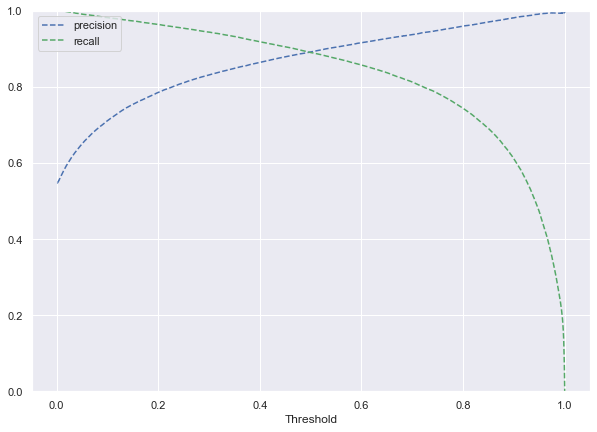

In [113]:
# predict_proba gives the probability of each observation belonging to each class
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

y_scores = log_reg.predict_proba(X_train) 

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

# Plotting values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')

plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observations:**
- As we can see on the Precision Recall scissor trend, we won't be able to get an good performance for recall without losing too much precision. Let's see that below

In [114]:
# Calculating the exact threshold where precision and recall are equal
for i in np.arange(len(thresholds)):
    if precisions[i] == recalls[i]:
        print(thresholds[i])

0.49771145134807654


**Observation:**
- We can see the breakeven point of precision and recall when the threshold is set to ~0.208

Let's plot the confusion matrices using this threshold value

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     38526
         1.0       0.89      0.89      0.89     46415

    accuracy                           0.88     84941
   macro avg       0.88      0.88      0.88     84941
weighted avg       0.88      0.88      0.88     84941



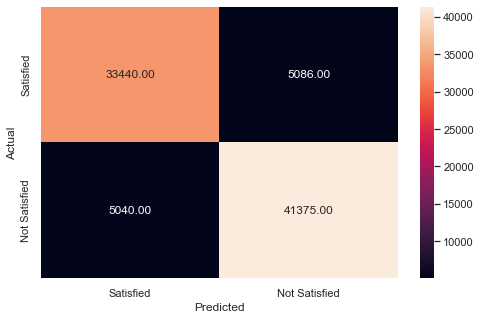

In [115]:
optimal_threshold = 0.49607985783414527

y_scores[:, 1] > optimal_threshold

metrics_score(y_train, y_scores[:, 1] > optimal_threshold)

In [116]:
# Defining the Logistic regression model
log_reg = LogisticRegression()

# Fitting the model on the test data 
log_reg.fit(X_test,y_test)

LogisticRegression()

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      4260
         1.0       0.89      0.90      0.90      5178

    accuracy                           0.88      9438
   macro avg       0.88      0.88      0.88      9438
weighted avg       0.88      0.88      0.88      9438



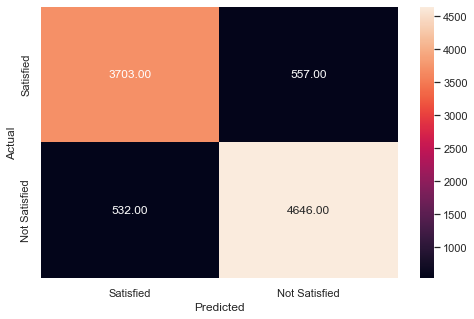

In [117]:
# Checking performance on the testing data
y_pred_test_log_reg_f1_score = log_reg.predict_proba(X_test)

metrics_score(y_test, y_pred_test_log_reg_f1_score[:, 1] > optimal_threshold)

In [74]:
y_pred_test_log_reg_f1_score

array([[0.03064343, 0.96935657],
       [0.04765615, 0.95234385],
       [0.23810896, 0.76189104],
       ...,
       [0.74110058, 0.25889942],
       [0.00454042, 0.99545958],
       [0.95647847, 0.04352153]])

### **MODEL 2 - K-Nearest Neighbors (K-NN)**

- K-NN is a distance-based algorithm and all distance-based algorithms are affected by the scale of the data.
- We will scale the attributes (DataFrame X defined above) before building the K-NN model.
- Then, we need to identify the value of K to be used in K-NN. We will use **GridSearchCV** to find the optimal value of K along with other hyperparameters.

In [1075]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# Transform the testing data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) 

### KNN Tuning Hyperparameters

Using GridSearchCV to find the value of K and other hyperparameters

Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation.
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
Grid search is an exhaustive search of values that tries many iterations to compute the optimum values of hyperparameters.

The hyperparameters that we are tuning are:
- n_neighbors: Number of neighbors to use.
- weights={'uniform', 'distance'}
-- uniform : uniform weights. All points in each neighborhood are weighted equally.
-- distance : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors that are further away.
- p: When p = 1, this is equivalent to using Manhattan_distance (L1), and Euclidean_distance (L2) is used for p = 2.

In [1076]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

params_knn = {'n_neighbors':np.arange(2, 20), 'weights':['uniform','distance'], 'p':[1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'accuracy', cv = 10)

model_knn = grid_knn.fit(X_train_scaled,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KeyboardInterrupt: 

In [71]:
# Fit the best estimator on the training data
knn_estimator.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3578
           1       1.00      0.99      1.00       892

    accuracy                           1.00      4470
   macro avg       1.00      1.00      1.00      4470
weighted avg       1.00      1.00      1.00      4470



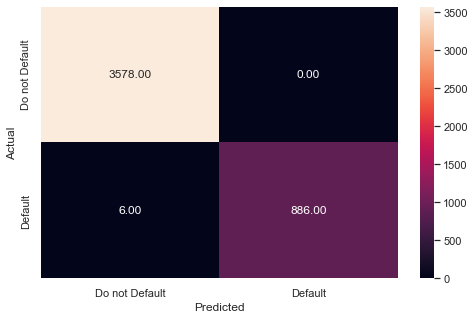

In [72]:
# Make predictions on the scaled training data and check the performance (using metrics_score function)
y_pred_train = knn_estimator.predict(X_train) 

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1193
           1       0.68      0.45      0.54       297

    accuracy                           0.85      1490
   macro avg       0.78      0.70      0.73      1490
weighted avg       0.83      0.85      0.84      1490



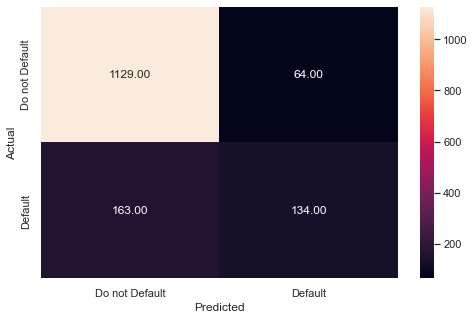

In [73]:
# Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test =  knn_estimator.predict(X_test)

metrics_score(y_test, y_pred_test)

### **MODEL 3 - KNearest Centroid**

In [74]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# Transform the testing data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) 

## NearestCentroid Tuning Hyperparameters

The hyperparameters that we are tuning are:
- metric: The metric to use when calculating distance between instances
- - Euclidean: distance between two points in Euclidean space is the length of a line segment between the two points
- - Cosine: measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction
- schrink_threshold: Threshold for shring centroids to remove features
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

In [75]:
from sklearn.neighbors import NearestCentroid
knn = NearestCentroid()

params_knn = {'metric':['euclidean','cosine'],'shrink_threshold':[None,1,2,3,4,5]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(X_train_scaled,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

NearestCentroid(metric='cosine')


In [76]:
# Fit the best estimator on the training data
knn_estimator.fit(X_train, y_train)

NearestCentroid(metric='cosine')

              precision    recall  f1-score   support

           0       0.86      0.57      0.69      3578
           1       0.27      0.64      0.38       892

    accuracy                           0.59      4470
   macro avg       0.57      0.61      0.54      4470
weighted avg       0.75      0.59      0.63      4470



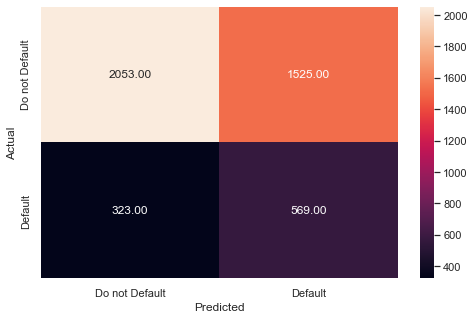

In [77]:
# Make predictions on the scaled training data and check the performance (using metrics_score function)
y_pred_train = knn_estimator.predict(X_train) 

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.87      0.56      0.68      1193
           1       0.28      0.67      0.39       297

    accuracy                           0.58      1490
   macro avg       0.57      0.62      0.54      1490
weighted avg       0.75      0.58      0.62      1490



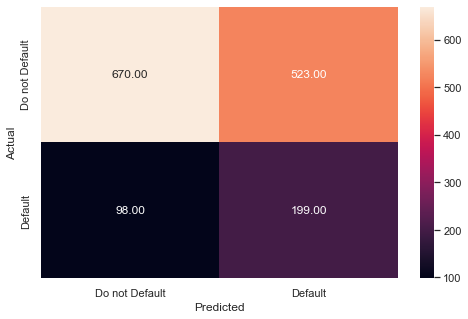

In [78]:
# Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test =  knn_estimator.predict(X_test)

metrics_score(y_test, y_pred_test)

## **Model 4 - Decision Tree**

#### Separating the target variable y and independent variable x

In [118]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

X = df.drop(columns = 'Overall_Experience')
# reminder 1 = satisfied, 0 = unsatisfied 

# Create dummy variables for the categorical variables 
X = pd.get_dummies(X, drop_first=True)

y = df[['Overall_Experience','dataset_type_x']]

#scaler = StandardScaler()
#scaler = MinMaxScaler()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Applying fit_transform on the training features data
X_scale = scaler.fit_transform(X)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
X_scale = pd.DataFrame(X_scale, index = X.index, columns = X.columns)

#change the X data to the Xscale data
X = X_scale

#split out the test and train data sets
X = X.loc[df['dataset_type_x'] == 'train']
X.drop(columns=['dataset_type_x_train','dataset_type_y_train'],axis=1,inplace=True)
solution_test = X.loc[df['dataset_type_x'] == 'test']
#drop the test data from y
y = y[y['dataset_type_x']=='train']
y.drop(columns=['dataset_type_x'],axis=1,inplace=True)

#### Split the data 75% train dataset 25% test dataset

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1)

In [120]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree =  DecisionTreeClassifier(random_state = 1)

In [121]:
#fitting Decision tree model
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38526
         1.0       1.00      1.00      1.00     46415

    accuracy                           1.00     84941
   macro avg       1.00      1.00      1.00     84941
weighted avg       1.00      1.00      1.00     84941



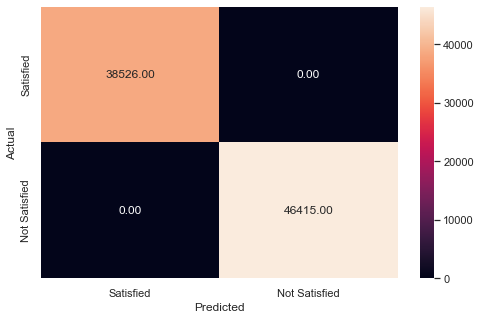

In [122]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      4260
         1.0       0.93      0.94      0.94      5178

    accuracy                           0.93      9438
   macro avg       0.93      0.93      0.93      9438
weighted avg       0.93      0.93      0.93      9438



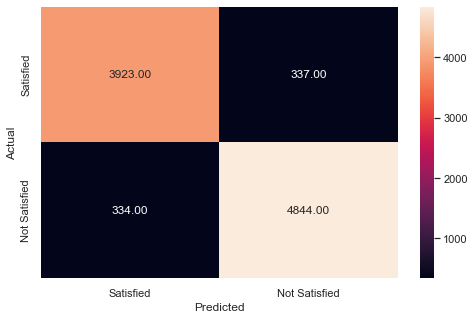

In [123]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

In [124]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree_class_weight =  DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8},random_state = 1)

In [125]:
#fitting Decision tree model
d_tree_class_weight.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38526
         1.0       1.00      1.00      1.00     46415

    accuracy                           1.00     84941
   macro avg       1.00      1.00      1.00     84941
weighted avg       1.00      1.00      1.00     84941



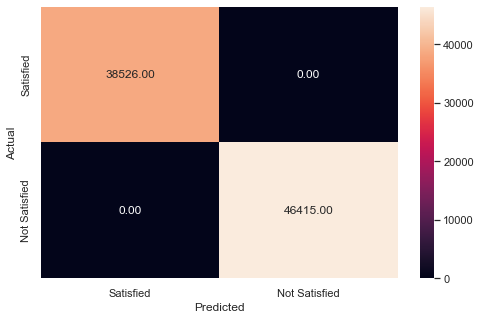

In [126]:
# Checking performance on the training data
y_pred_train1 = d_tree_class_weight.predict(X_train)

metrics_score(y_train, y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      4260
         1.0       0.93      0.93      0.93      5178

    accuracy                           0.92      9438
   macro avg       0.92      0.92      0.92      9438
weighted avg       0.92      0.92      0.92      9438



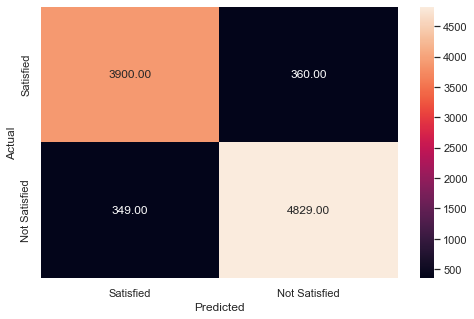

In [127]:
# Checking performance on the testing data
y_pred_test1 = d_tree_class_weight.predict(X_test)

metrics_score(y_test, y_pred_test1)

<AxesSubplot:xlabel='Importance'>

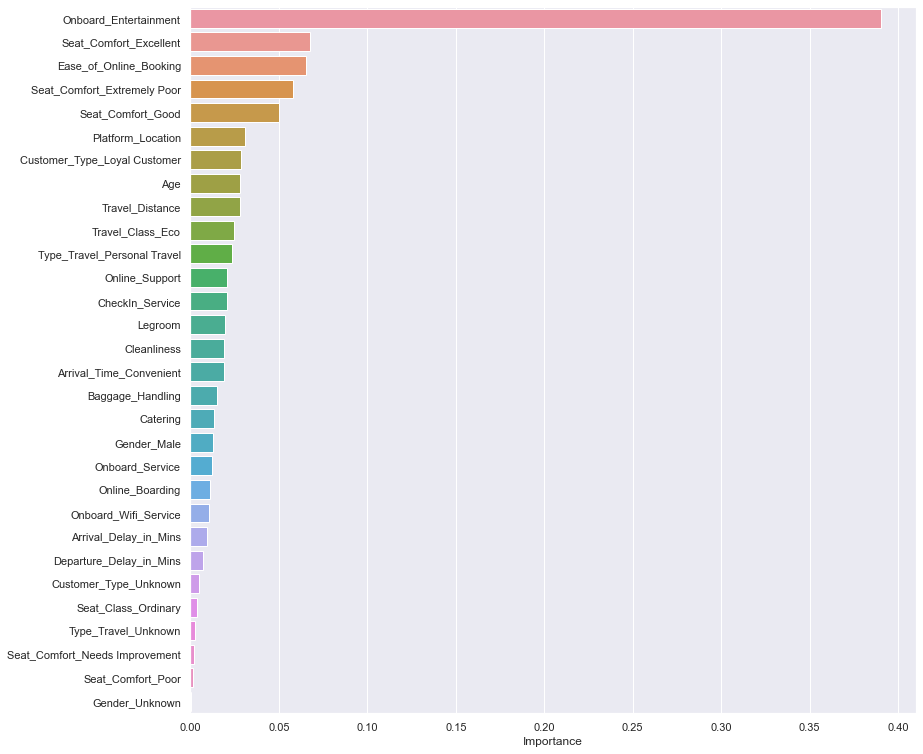

In [128]:
# Plot the feature importance

importances = d_tree.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**max_features**

The number of features to consider when looking for the best split.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


**We kept the class_weight as we know the data is imbalanced, tuning the parameter enabled better performance using the class_weight

#### Using GridSearchCV for Hyperparameter tuning on the model

In [101]:
# Choose the type of classifier 
d_tree_tuned =  DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8},random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [2,3,4,5, 10, 20,25],
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(accuracy_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=2,
                       min_samples_leaf=2, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80     34224
         1.0       0.82      0.86      0.84     41279

    accuracy                           0.82     75503
   macro avg       0.82      0.82      0.82     75503
weighted avg       0.82      0.82      0.82     75503



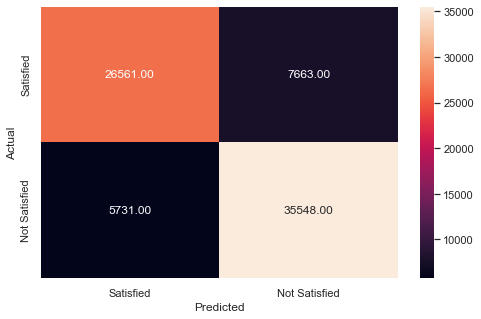

In [102]:
# Checking performance on the training data based on the tuned model
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      8562
         1.0       0.82      0.86      0.84     10314

    accuracy                           0.82     18876
   macro avg       0.82      0.82      0.82     18876
weighted avg       0.82      0.82      0.82     18876



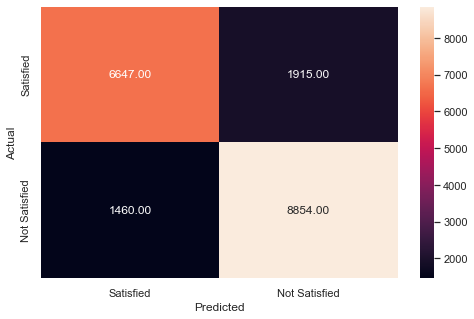

In [103]:
# Checking performance on the testing data based on the tuned model
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

#### Checking the performance on the test dataset

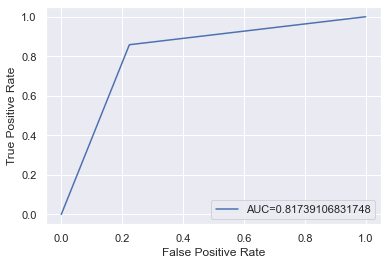

In [104]:
#define metrics
y_pred_proba = d_tree_tuned.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_test2)
auc = metrics.roc_auc_score(y_test, y_pred_test2)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### Plotting the feature importance for the tuned Decision Tree

<AxesSubplot:xlabel='Importance'>

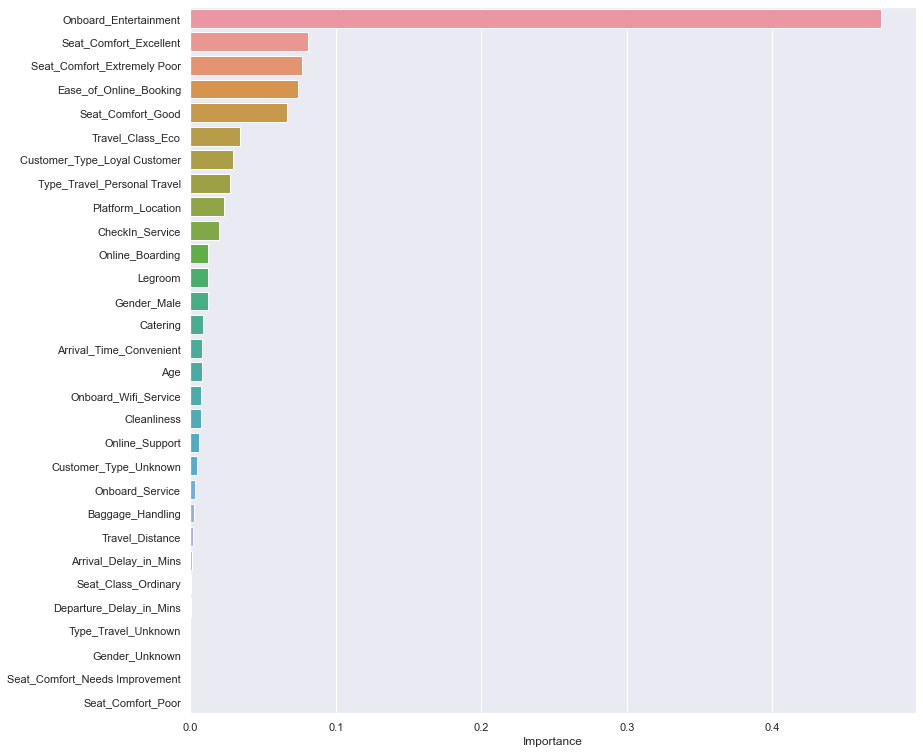

In [1101]:
# Plot the feature importance

importances = d_tree_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

#### Plotting the Decision Tree Structure

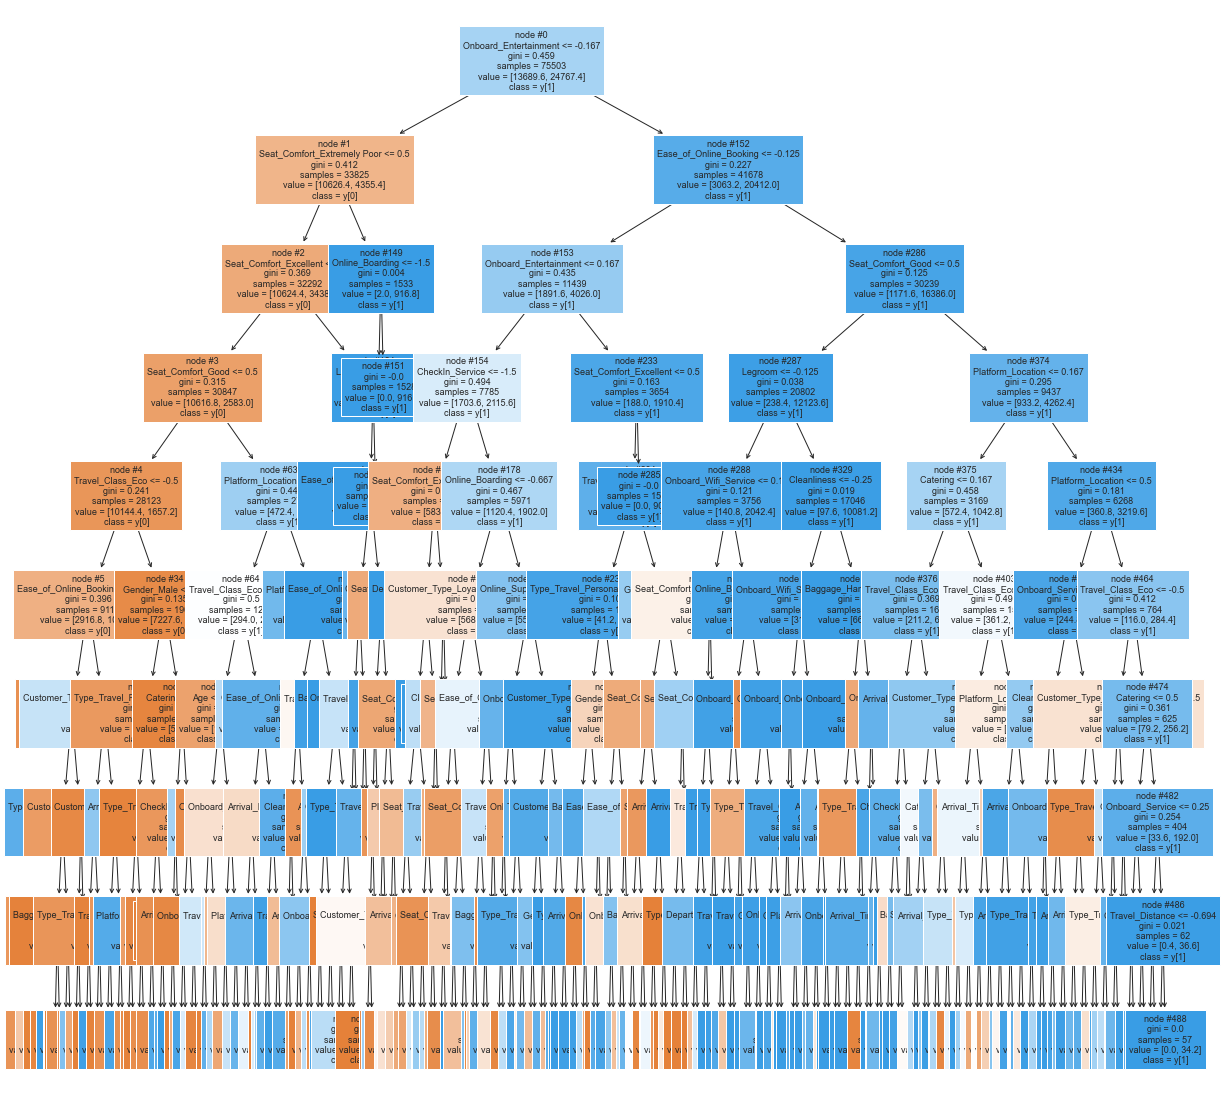

In [1102]:
# Plot the decision  tree and analyze it to build the decision rule
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

### **MODEL 5 - Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [1103]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34224
         1.0       1.00      1.00      1.00     41279

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



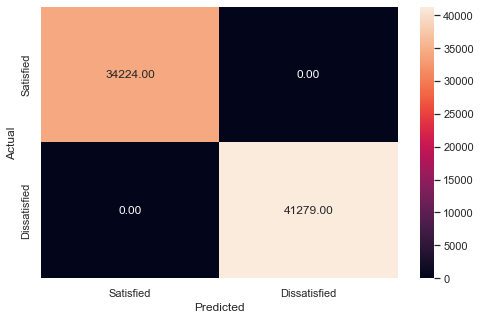

In [1104]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      8562
         1.0       0.96      0.95      0.95     10314

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



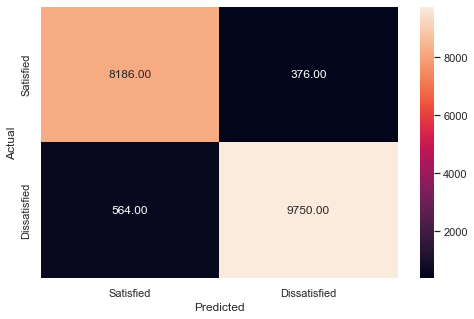

In [1105]:
# Checking performance on the test data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

### **Build a Random Forest model with Class Weights**

In [1106]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier(class_weight={0: 0.4, 1: 0.6},random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34224
         1.0       1.00      1.00      1.00     41279

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



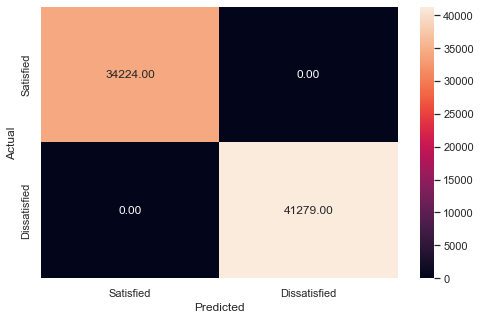

In [1107]:
# Checking performance on the train data
y_pred_train4 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      8562
         1.0       0.96      0.94      0.95     10314

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



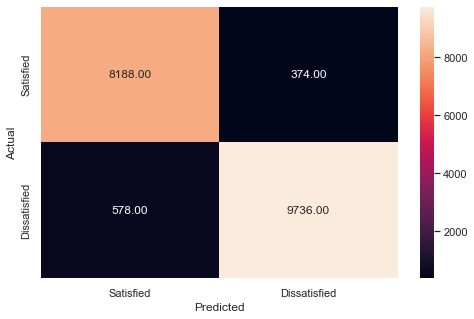

In [1108]:
# Checking performance on the test data
y_pred_test4 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Insights**:

The model is still overfitting as the performance of the metrics on the train dataset is 100% and decreased significantly on the test dataset

Confusion Matrix (numbers provided for test dataset):
- **True Negative (TN):** Predicting the borrower won't default the loan and the borrower did not default the loan -> 1161
- **False Negative (FN):** Predicting the borrower won't default the loan but the borrower defaulted the loan -> 111
- **True Positive (TP):** Predicting the borrower will default the loan and the borrower defaulted the loan -> 186
- **False Positive (FP):** Predicting the borrower will default the loan and the borrower did not default the loan-> 32

Metric calculations:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)               
--> 90%
---
- Recall = TP / (TP + FN)                                  
--> 63%
---
- Precision = TP / (TP + FP)                               
--> 85%
---
- F1-Score = 2 * Recall * Precision / (Recall + Precision) 
--> 72%

Recall lost an additional 6% and precision slightly decreased by 3%.

Let's try to tune the hyperparameters to see if we can improve the performance of the model for recall.

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [1109]:
# first try to tune hyperparameters, took a long tme

# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(class_weight={0: 0.4, 1: 0.6},random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
              "criterion": ['gini', 'entropy'],
              "max_depth": np.arange(2, 12),
              "min_samples_leaf": [5,10,15,20,25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

KeyboardInterrupt: 

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3578
           1       0.57      0.83      0.68       892

    accuracy                           0.84      4470
   macro avg       0.76      0.84      0.79      4470
weighted avg       0.88      0.84      0.85      4470



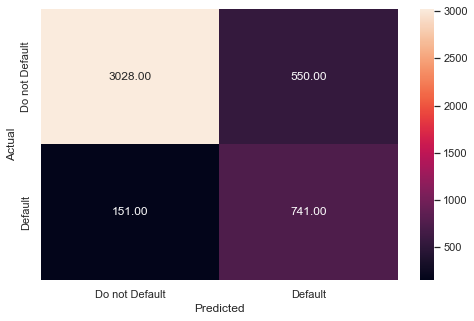

In [104]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1193
           1       0.85      0.63      0.72       297

    accuracy                           0.90      1490
   macro avg       0.88      0.80      0.83      1490
weighted avg       0.90      0.90      0.90      1490



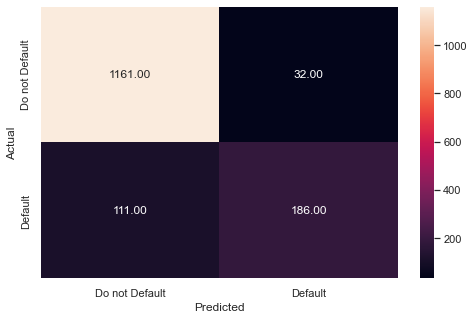

In [105]:
# Checking performace on test dataset
y_pred_test5 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test5)

#### Plot the Feature importance of the tuned Random Forest

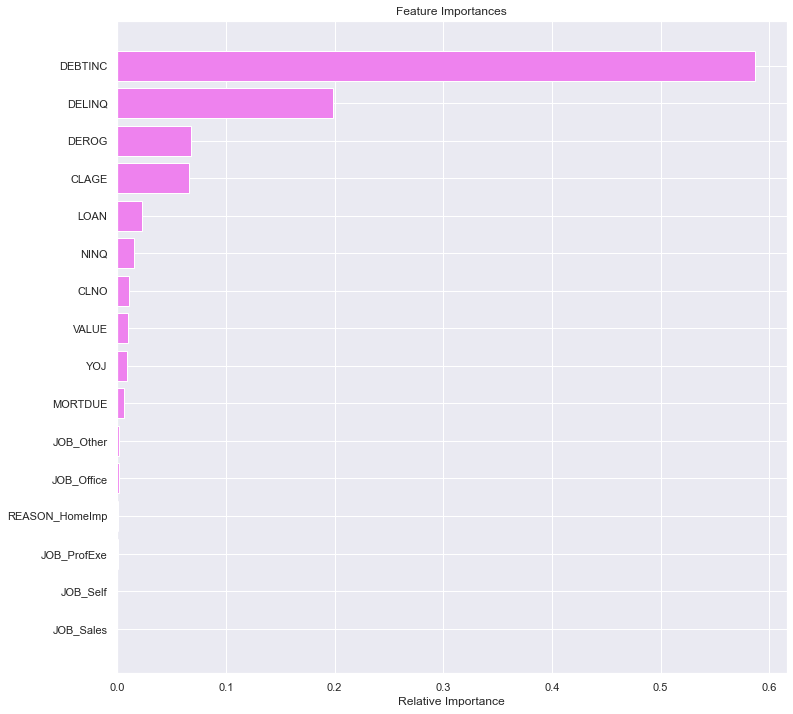

In [106]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

# Model 6 - Support Vector Machines

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit_transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# Transform the testing data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) 

params_svm = {"class_weight": [{0: 0.2, 1: 0.8}, "balanced"]}

grid_svm = GridSearchCV(estimator = svm.SVC(), param_grid = params_svm, scoring = 'recall', cv = 10)

model_svm = grid_svm.fit(X_train_scaled,y_train)

svm_estimator = model_svm.best_estimator_

print(model_svm)

In [ ]:
# Fit the best estimator on the training data
svm_estimator.fit(X_train, y_train)

In [ ]:
# Make predictions on the scaled training data and check the performance (using metrics_score function)
y_pred_train = svm_estimator.predict(X_train) 

metrics_score(y_train, y_pred_train)

In [ ]:
# Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test =  svm_estimator.predict(X_test)

metrics_score(y_test, y_pred_test)